In [3]:
# Figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default') # set to your personal preference
import matplotlib.font_manager
import matplotlib.font_manager
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

#import seaborn as sns
#sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)

# Ipython notebook basics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.setrecursionlimit(5000)

# Things I use everytime
import numpy as np
np.random.seed(42)
import pandas as pd
import scipy.stats as stats



## Example of how to plot the similarity across the genome for a single pair of individuals

In [63]:
pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/pairwiseComparisons/3dcomp_EUR_FIN_female_HG00285_vs_vindija.txt",sep="\t")
pair.head()

chr  windowStartPos       mse  spearman  triangle_mse  triangle_spearman  \
0  chr1               0  0.006221  0.976632      0.000521           0.987378   
1  chr1          524288  0.000708  0.998556      0.000081           0.998552   
2  chr1         1048576  0.001309  0.997306      0.000029           0.999782   
3  chr1         1572864  0.001585  0.995972      0.000164           0.997606   
4  chr1         2097152  0.004564  0.983062      0.000308           0.996790   

   insulation_spearman  
0             0.986367  
1             0.996927  
2             0.998156  
3             0.996876  
4             0.990035

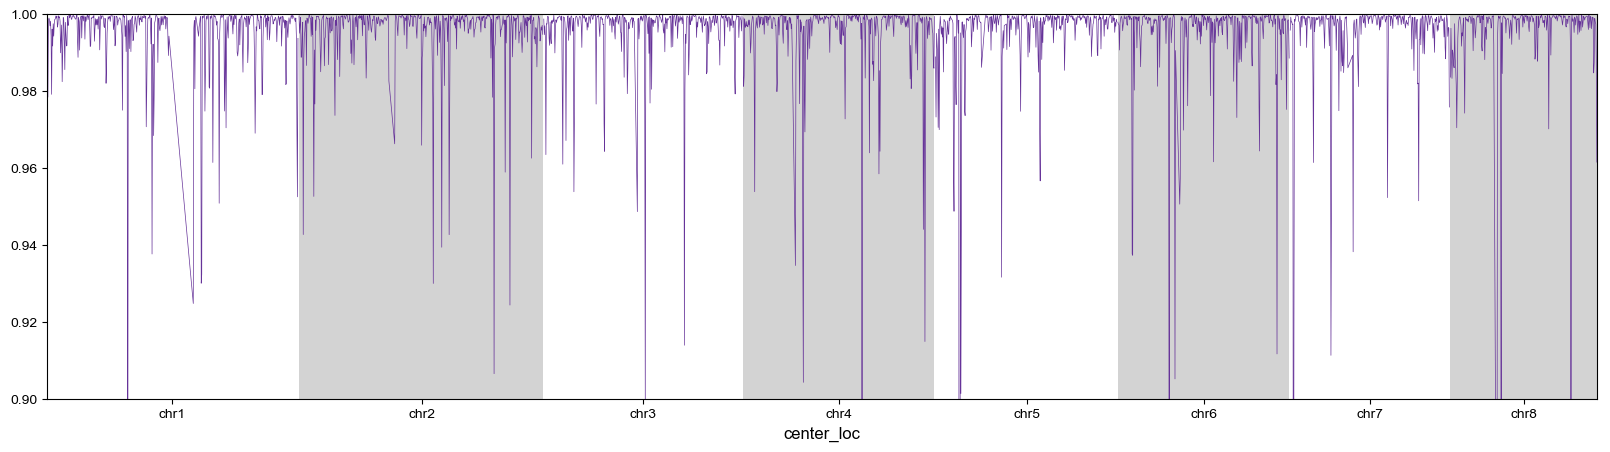

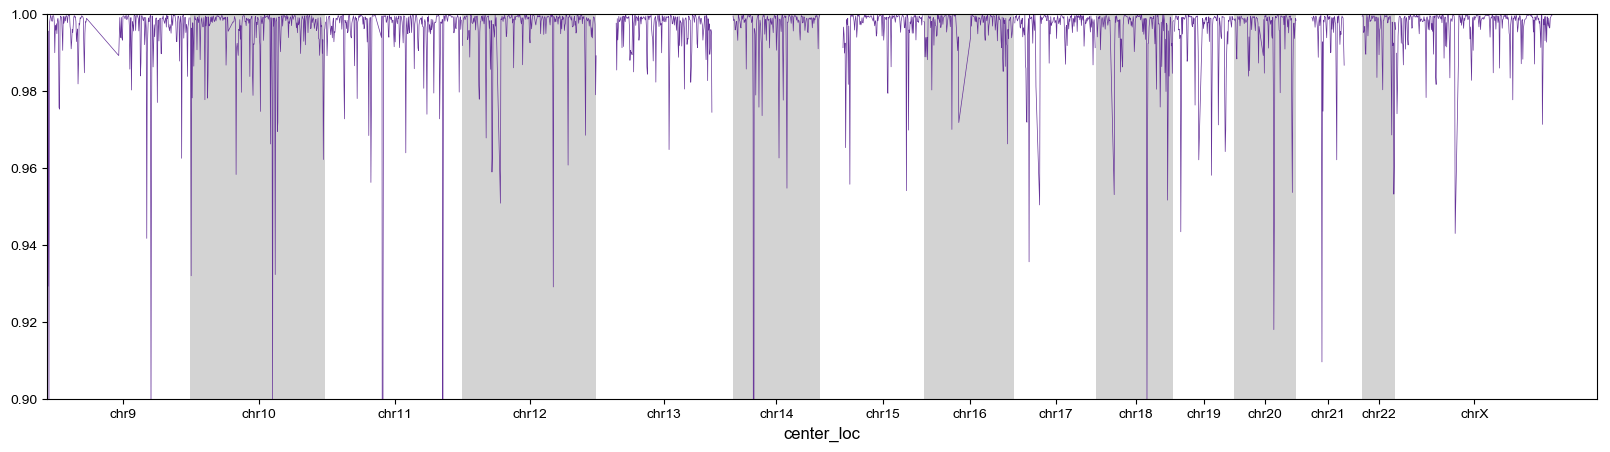

In [64]:
chroms = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8'] # did this to split the plot into a top panel and bottom, but you could just put all chroms here for 1 linear plot

fig = plt.figure(figsize=(20,5))
x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')

pair = pairs[('AFR_ESN_female_HG03105','altai')]

maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    pair['center_loc'] = (pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    _ = pair[pair['chr'] == chrm].plot(kind='line',x='center_loc',y='spearman',color='rebeccapurple', ax=ax, alpha=1, linewidth=0.5)
    maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(pair[pair['chr'] == chrm]['center_loc'].mean()) # save the position for the xlabels
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(pair[pair['chr'] == chrm]['center_loc'].min(), pair[pair['chr'] == chrm]['center_loc'].max(), facecolor='lightgray')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.9,1)
maxLocOld = maxLoc
plt.show()

# second half of the fig

chroms = ['chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX']
fig = plt.figure(figsize=(20,5))
x_labels = []
x_labels_pos = []

ax = fig.add_subplot(111)
maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    pair['center_loc'] = (pair['windowStartPos'] + 2**20)/2 + maxLoc
    _ = pair[pair['chr'] == chrm].plot(kind='line',x='center_loc',y='spearman',color='rebeccapurple', ax=ax, linewidth=0.5)
    maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10
    x_labels_pos.append(pair[pair['chr'] == chrm]['center_loc'].mean())
    if (num % 2) == 0:
        _ = ax.axvspan(pair[pair['chr'] == chrm]['center_loc'].min(), pair[pair['chr'] == chrm]['center_loc'].max(), facecolor='lightgray')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLocOld) # this is to scale so the top panel and bottom panel have the same scale (will leave some white space behind the x chrom)
_ = ax.set_ylim(0.9,1)

## Read in all pairwise comparisons and genome-coverage into a dictionary

In [2]:
coverage = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_AFR_GWD_female_HG03539.txt",sep="\t",header=None)
coverage.columns= ['chr','windowStartPos','coverage','masked_coverage']
regionsToKeep = coverage[coverage['coverage'] == 1][['chr','windowStartPos']]
len(regionsToKeep) # only keep regions with full coverage in 1kg!!

FileNotFoundError: File b'/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_AFR_GWD_female_HG03539.txt' does not exist

In [12]:
# This takes a few minutes
indivs = ['chagyrskaya', 'denisova', 'altai' ,'vindija','AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159', 'EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851', 'EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']

pairs = {}
for i1 in indivs:
    print(i1)
    for i2 in indivs:
        try:
            pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/pairwiseComparisons/3dcomp_%s_vs_%s.txt.gz" % (i1,i2),sep="\t")
            coverage1 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_%s.txt.gz" % i1,sep="\t",header=None)
            coverage1.columns = ['chr','windowStartPos','%s_coverage'% i1,'masked_coverage']
            coverage2 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_%s.txt.gz" % i2,sep="\t",header=None)
            coverage2.columns = ['chr','windowStartPos','%s_coverage'% i2,'masked_coverage']
            pair = pair.merge(coverage1).merge(coverage2)
            pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos']) # only keep windows with full coverage in 1kg
            pairs[(i1,i2)] = pair
        except FileNotFoundError:
            pass

pairs[('altai','chagyrskaya')].head()
len(pairs) # should be 190 when all pair-wise comparisons are finished


chagyrskaya chagyrskaya
chagyrskaya denisova
chagyrskaya altai
chagyrskaya vindija
chagyrskaya AFR_ESN_female_HG03105
chagyrskaya AFR_GWD_female_HG03539
chagyrskaya AFR_LWK_female_NA19378
chagyrskaya AFR_MSL_female_HG03212
chagyrskaya AFR_YRI_female_NA18870
chagyrskaya AFR_YRI_female_NA19159
chagyrskaya EAS_CDX_female_HG00978
chagyrskaya EAS_CHB_female_NA18595
chagyrskaya EAS_CHS_female_HG00560
chagyrskaya EAS_JPT_female_NA19077
chagyrskaya EAS_KHV_female_HG01851
chagyrskaya EUR_CEU_female_NA12006
chagyrskaya EUR_FIN_female_HG00285
chagyrskaya EUR_GBR_female_HG00261
chagyrskaya EUR_IBS_female_HG01519
chagyrskaya EUR_TSI_female_NA20795
denisova denisova
denisova altai
denisova vindija
denisova AFR_ESN_female_HG03105
denisova AFR_GWD_female_HG03539
denisova AFR_LWK_female_NA19378
denisova AFR_MSL_female_HG03212
denisova AFR_YRI_female_NA18870
denisova AFR_YRI_female_NA19159
denisova EAS_CDX_female_HG00978
denisova EAS_CHB_female_NA18595
denisova EAS_CHS_female_HG00560
denisova EAS_JPT_fe

EUR_IBS_female_HG01519 EUR_IBS_female_HG01519
EUR_IBS_female_HG01519 EUR_TSI_female_NA20795
EUR_TSI_female_NA20795 EUR_TSI_female_NA20795


chr  windowStartPos       mse  spearman  triangle_mse  triangle_spearman  \
0  chr1          524288  0.000049  0.999901  4.745326e-06           0.999922   
1  chr1         1048576  0.000028  0.999948  1.799373e-06           0.999985   
2  chr1         1572864  0.000219  0.999428  3.506708e-05           0.999574   
3  chr1         4194304  0.000144  0.997310  2.901225e-05           0.998961   
4  chr1         4718592  0.000016  0.999753  8.135833e-07           0.999812   

   insulation_spearman  altai_coverage  masked_coverage  chagyrskaya_coverage  
0             0.999617        0.445566         0.443856              0.445396  
1             0.999688        0.570948         0.569921              0.570571  
2             0.998922        0.644570         0.643854              0.644262  
3             0.997824        0.751499         0.751086              0.751260  
4             0.999144        0.762431         0.762168              0.762219

190

In [13]:
len(pairs[('vindija','altai')])


4999

## Plot all pairwise comparisons with 1 individual (Example with Altai)

In [4]:
amh = ['AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159', 'EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851', 'EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']
amh_afr = ['AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159']
amh_eas = ['EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851']
amh_eur = ['EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']
altai_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
for i in amh:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman']]
    pair.columns = ['chr','windowStartPos',i]
    altai_comps = altai_comps.merge(pair, on =['chr','windowStartPos'],how='outer')

altai_comps[altai_comps['chr'] == 'chr18'].head()

NameError: name 'pairs' is not defined

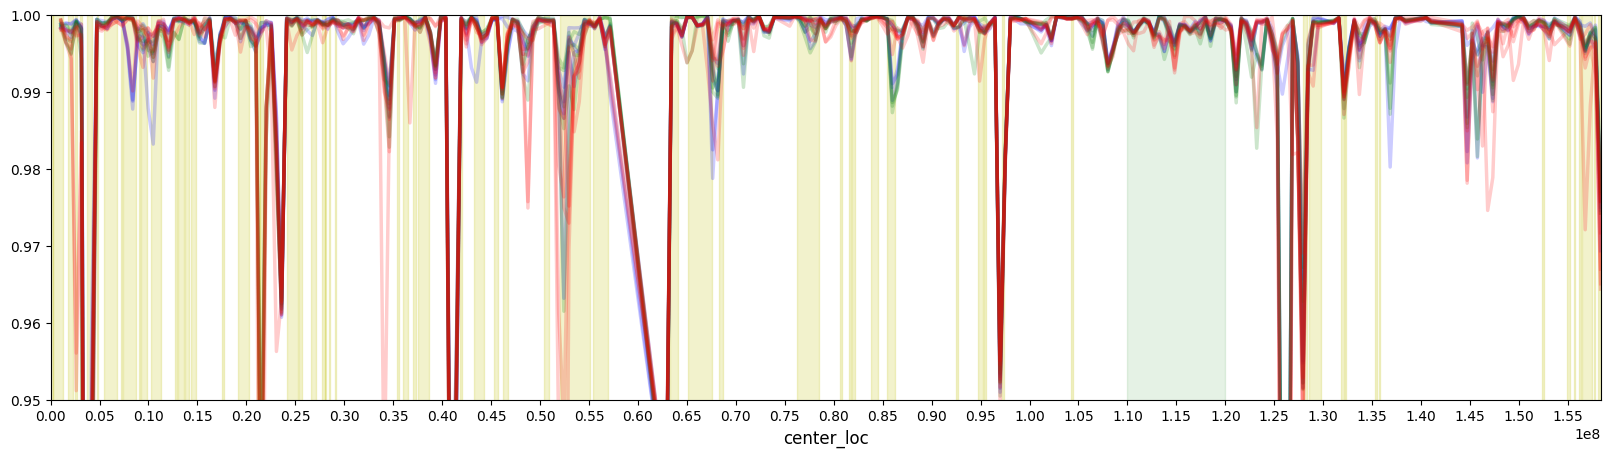

In [10]:
# adjust these
chrm = 'chr7' #
pair = altai_comps
#pair = vindija_comps

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

#start = 116916224 # adjust
#end = 121110528 -2**20#adjust


num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
for i in amh_eur:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='blue', ax=ax, alpha=0.2, linewidth=2.5)
for i in amh_eas:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='g', ax=ax, alpha=0.2, linewidth=2.5)
for i in amh_afr:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='r', ax=ax, alpha=0.2, linewidth=2.5)

maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks(np.arange(0,maxLoc,5000000))
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.92,1)
#plt.show()


#fig = plt.figure(figsize=(20,5))
#ax = fig.add_subplot(111)

# Read in vernot, browning segments and sankararaman deserts
vernot_segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
vernot_segs = vernot_segs[vernot_segs[0]==chrm]
vernot_segs['len'] = vernot_segs[2] - vernot_segs[1]
#_ = plt.broken_barh([(i,j) for i,j in zip(vernot_segs[1],vernot_segs['len'])], (0,1),color='darkorange',alpha=0.16)

sprime_segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
sprime_segs = sprime_segs[sprime_segs[0]==chrm]
sprime_segs['len'] = sprime_segs[2] - sprime_segs[1]
_ = plt.broken_barh([(i,j) for i,j in zip(sprime_segs[1],sprime_segs['len'])], (0,1),color='y',alpha=0.2)

deserts = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
deserts.iloc[:,0] = deserts.iloc[:,0].apply(lambda x: 'chr%s' % x)
deserts['len'] = deserts[2] - deserts[1]
deserts = deserts[deserts[0]==chrm]
_ = plt.broken_barh([(i,j) for i,j in zip(deserts[1],deserts['len'])], (0,1),color='g',alpha=0.1)

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist = blacklist[blacklist[0]==chrm]
blacklist[1] = blacklist[1] - 2**20/2
blacklist[2] = blacklist[2] + 2**20/2
blacklist['len'] = blacklist[2] - blacklist[1]
#_ = plt.broken_barh([(i,j) for i,j in zip(blacklist[1],blacklist['len'])], (0,1),color='k',alpha=0.2)

_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.95,1)

_ = ax.set_xticks(np.arange(0,maxLoc,5000000))


plt.show()

In [74]:
ESN_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
afr_subset = ['AFR_ESN_female_HG03105','AFR_GWD_female_HG03539','AFR_LWK_female_NA19378','AFR_MSL_female_HG03212']
for i in ['vindija','altai','chagyrskaya','denisova']:
    for j in afr_subset:
        pair = pairs[(j,i)][['chr','windowStartPos','spearman']]
        pair.columns = ['chr','windowStartPos',i + '_' + j]
        ESN_comps = ESN_comps.merge(pair, on =['chr','windowStartPos'],how='outer')
    ESN_comps[i] = ESN_comps[[i + '_' + x for x in ['AFR_ESN_female_HG03105','AFR_GWD_female_HG03539','AFR_LWK_female_NA19378','AFR_MSL_female_HG03212']]].mean(axis=1)

idx = 0
for i in range(len(afr_subset)):
    for j in range(len(afr_subset)):
        if j < i: 
            idx+=1
            pair = pairs[(afr_subset[i],afr_subset[j])][['chr','windowStartPos','spearman']]
            pair.columns = ['chr','windowStartPos',idx]
            ESN_comps = ESN_comps.merge(pair, on =['chr','windowStartPos'],how='outer')

            
            

In [59]:
ESN_comps

chr  windowStartPos  vindija_AFR_ESN_female_HG03105  \
0     chr1          524288                        0.998865   
1     chr1         1048576                        0.998411   
2     chr1         1572864                        0.997969   
3     chr1         4194304                        0.996301   
4     chr1         4718592                        0.992356   
...    ...             ...                             ...   
4994  chrX       150994944                        0.999126   
4995  chrX       152567808                        0.999373   
4996  chrX       153092096                        0.999414   
4997  chrX       153616384                        0.999707   
4998  chrX       154140672                        0.999678   

      vindija_AFR_GWD_female_HG03539  vindija_AFR_LWK_female_NA19378  \
0                           0.997582                        0.998582   
1                           0.996334                        0.996475   
2                           0.998218                        0.995871   
3                           0.991123                        0.997437   
4                           0.991321                        0.990175   
...                              ...                             ...   
4994                        0.999329                        0.999393   
4995                        0.999739                        0.999762   
4996                        0.999828                        0.999695   
4997                        0.999510                        0.999549   
4998                        0.999743                        0.999625   

      vindija_AFR_MSL_female_HG03212   vindija  altai_AFR_ESN_female_HG03105  \
0                           0.998263  0.998323                      0.998616   
1                           0.997298  0.997130                      0.999060   
2                           0.998206  0.997566                      0.998527   
3                           0.998590  0.995863                      0.996185   
4                           0.994322  0.992044                      0.991800   
...                              ...       ...                           ...   
4994                        0.998509  0.999089                      0.998999   
4995                        0.999401  0.999569                      0.999166   
4996                        0.999583  0.999630                      0.999335   
4997                        0.999648  0.999603                      0.999776   
4998                        0.999603  0.999662                      0.999770   

      altai_AFR_GWD_female_HG03539  altai_AFR_LWK_female_NA19378  ...  \
0                         0.997645                      0.998379  ...   
1                         0.997341                      0.997412  ...   
2                         0.998667                      0.996695  ...   
3                         0.992321                      0.997539  ...   
4                         0.990736                      0.988684  ...   
...                            ...                           ...  ...   
4994                      0.999466                      0.999455  ...   
4995                      0.999702                      0.999701  ...   
4996                      0.999836                      0.999714  ...   
4997                      0.999564                      0.999650  ...   
4998                      0.999791                      0.999707  ...   

      denisova_AFR_GWD_female_HG03539  denisova_AFR_LWK_female_NA19378  \
0                            0.997621                         0.999171   
1                            0.996527                         0.996156   
2                            0.998045                         0.995257   
3                            0.982397                         0.996514   
4                            0.985222                         0.995578   
...                               ...                              ...   
4994                         0.999602    

In [78]:
ESN_comps = ESN_comps[ESN_comps['chr'] == 'chr7']
ESN_comps = pd.DataFrame(np.arange(0,ESN_comps['windowStartPos'].max(),2**20/2), columns=['windowStartPos']).merge(ESN_comps,how='left')
ESN_comps['chr'] = 'chr7'

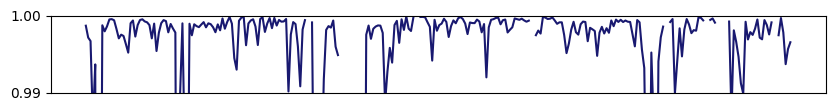

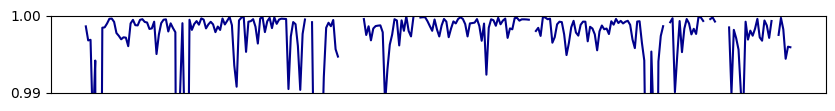

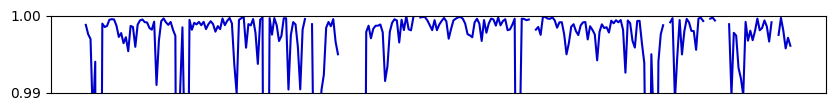

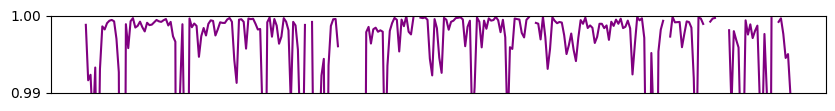

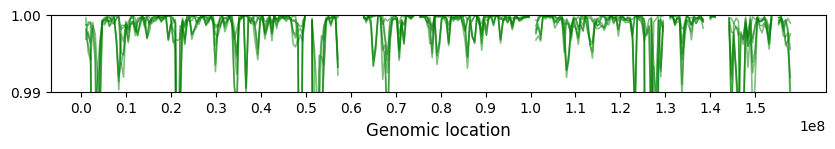

In [80]:
# adjust these
chrm = 'chr7' #
pair = ESN_comps
#pair = vindija_comps


##

fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
for i in ['vindija' ]:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='midnightblue', ax=ax, alpha=1, linewidth=1.5)


maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks([])
_ = ax.get_legend().remove()
_ = plt.xlabel('')
_ = ax.set_ylim(0.99,1)
plt.show()

##
fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
for i in ['chagyrskaya' ]:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='darkblue', ax=ax, alpha=1, linewidth=1.5)


maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks([])
_ = ax.get_legend().remove()
_ = plt.xlabel('')
_ = ax.set_ylim(0.99,1)
plt.show()

##

##
fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
for i in ['altai' ]:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='mediumblue', ax=ax, alpha=1, linewidth=1.5)


maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks([])
_ = ax.get_legend().remove()
_ = plt.xlabel('')
_ = ax.set_ylim(0.99,1)
plt.show()


##
fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
for i in ['denisova' ]:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='purple', ax=ax, alpha=1, linewidth=1.5)


maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks([])
_ = ax.get_legend().remove()
_ = plt.xlabel('')
_ = ax.set_ylim(0.99,1)
plt.show()

## 

fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
for i in [1,2,3,4,5,6]:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='green', ax=ax, alpha=0.5, linewidth=1.2)


maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks(np.arange(0,maxLoc,10000000))
_ = ax.get_legend().remove()
_ = ax.set_ylim(0.99,1)
_ = plt.xlabel('Genomic location')

plt.show()



## Generate clustermaps for pairwise similiarity

### Heat map (no clustering)

In [139]:
indivs = ['chagyrskaya', 'denisova', 'altai' ,'vindija','AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159', 'EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851', 'EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']
#indivs = pd.DataFrame(indivs).loc[np.array(g.dendrogram_row.reordered_ind[::-1])].values.flatten() # if you want to order it based on dendrograms below
for i in indivs:
    for j in indivs:
        try:
            pairs_matrix.loc[i,j] = pairs[(i,j)].mean()['spearman']
            pairs_matrix.loc[j,i] = pairs[(i,j)].mean()['insulation_spearman']
        except:
            try:
                pairs_matrix.loc[i,j] = pairs[(j,i)].mean()['spearman']
                pairs_matrix.loc[j,i] = pairs[(j,i)].mean()['insulation_spearman']
            except:
                pass
                
for i in indivs:
    pairs_matrix.loc[i,i] = 1

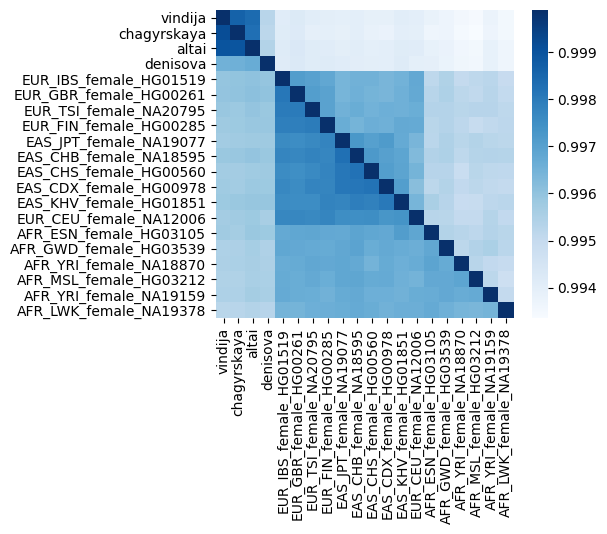

In [144]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(4.8,4))         # Sample figsize in inches
sns.heatmap(pairs_matrix,cmap='Blues',vmax=0.9999)

### Clustermap whole genome

In [82]:
for i in indivs:
    for j in indivs:
        try:
            pairs_matrix.loc[i,j] = pairs[(i,j)].mean()['spearman']
            pairs_matrix.loc[j,i] = pairs[(i,j)].mean()['spearman']
        except:
            try:
                pairs_matrix.loc[i,j] = pairs[(j,i)].mean()['spearman']
                pairs_matrix.loc[j,i] = pairs[(j,i)].mean()['spearman']
            except:
                pass
                
for i in indivs:
    pairs_matrix.loc[i,i] = 1
    

Index(['AFR_LWK_female_NA19378', 'AFR_YRI_female_NA19159',
       'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870',
       'AFR_GWD_female_HG03539', 'AFR_ESN_female_HG03105',
       'EUR_CEU_female_NA12006', 'EAS_KHV_female_HG01851',
       'EAS_CDX_female_HG00978', 'EAS_CHS_female_HG00560',
       'EAS_CHB_female_NA18595', 'EAS_JPT_female_NA19077',
       'EUR_FIN_female_HG00285', 'EUR_TSI_female_NA20795',
       'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'denisova', 'altai',
       'chagyrskaya', 'vindija'],
      dtype='object')

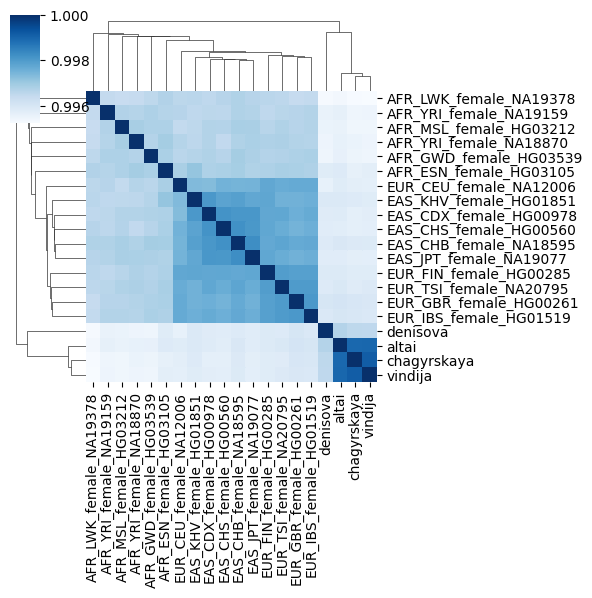

In [103]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(1 - pairs_matrix), method='single') # complete, single, average, weighted
g = sns.clustermap(pairs_matrix, cmap="Blues", row_linkage=linkage, col_linkage=linkage,figsize=(6,6)) #vmax=0.999
pairs_matrix.columns[g.dendrogram_row.reordered_ind]


### Clustermap part of genome

In [343]:
# for a region, change chrom, start, end
indivs = ['chagyrskaya', 'denisova', 'altai' ,'vindija','AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159', 'EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851', 'EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']

chrom = 'chr18'
start = 59569521
end = 60089689
start =0
end =4000000000000000

chrom = 'chr7'
start = 46000000 - 2**20/2
end = 46500000 + 2**20/2
import random
for i in indivs:
    for j in indivs:
        try:
            pair = pairs[(i,j)]
            region = pair[(pair['chr'] == chrom) & (pair['windowStartPos'] >= start) & (pair['windowStartPos'] <= end + 2**20)]
            pairs_matrix.loc[i,j] = region.mean()['spearman']
            pairs_matrix.loc[j,i] = region.mean()['spearman']
        except:
            try:
                pair = pairs[(j,i)]
                region = pair[(pair['chr'] == chrom) & (pair['windowStartPos'] >= start) & (pair['windowStartPos'] <= end + 2**20)]
                pairs_matrix.loc[i,j] = region.mean()['spearman']
                pairs_matrix.loc[j,i] = region.mean()['spearman']
            except:
                pass
for i in indivs:
    pairs_matrix.loc[i,i] = 1
    

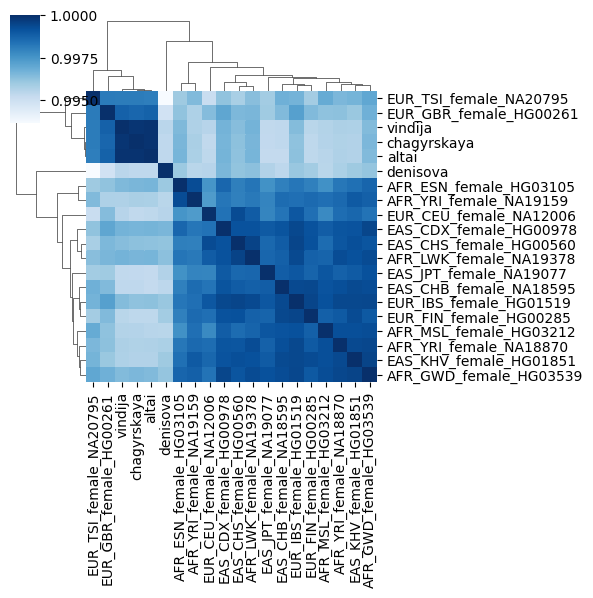

In [345]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(1 - pairs_matrix), method='complete') # complete, single, average, weighted
g = sns.clustermap(pairs_matrix, cmap="Blues", row_linkage=linkage, col_linkage=linkage, figsize=(6,6)) #vmax=0.999

## Sequence similarity vs 3d genome similarity

## Compare the different comparison metrics

spearman               0.607360
triangle_spearman      0.657382
insulation_spearman    0.713762
dtype: float64

mse    0.022101
dtype: float64

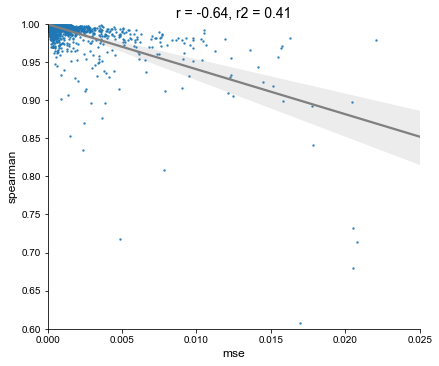

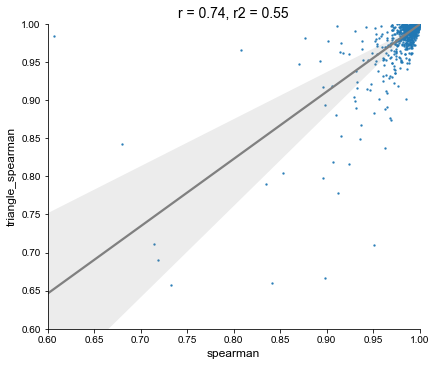

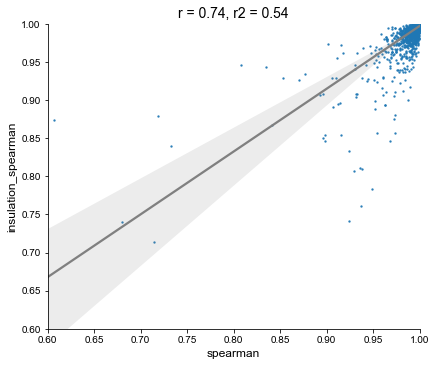

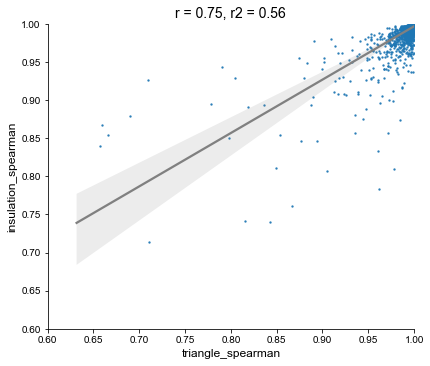

In [30]:
pairs[('AFR_ESN_female_HG03105','altai')][['spearman','triangle_spearman','insulation_spearman']].min()
pairs[('AFR_ESN_female_HG03105','altai')][['mse']].max()

g = sns.lmplot(x='mse',y='spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0,0.025))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['mse'].values, pairs[('AFR_ESN_female_HG03105','altai')]['spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

g = sns.lmplot(x='spearman',y='triangle_spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0.6,1))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['spearman'].values, pairs[('AFR_ESN_female_HG03105','altai')]['triangle_spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

g = sns.lmplot(x='spearman',y='insulation_spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0.6,1))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['spearman'].values, pairs[('AFR_ESN_female_HG03105','altai')]['insulation_spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

g = sns.lmplot(x='triangle_spearman',y='insulation_spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0.6,1))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['triangle_spearman'].values, pairs[('AFR_ESN_female_HG03105','altai')]['insulation_spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))



In [36]:
## Find some regions with differences between metrics

findDiff = pairs[('AFR_ESN_female_HG03105','altai')]
findDiff['spearman_triangle_diff'] = np.abs(findDiff['spearman'] - findDiff['triangle_spearman'])
findDiff.sort_values(by='spearman_triangle_diff',ascending=False)[['chr','windowStartPos','spearman','triangle_spearman','spearman_triangle_diff']].head(10)

chr  windowStartPos  spearman  triangle_spearman  \
1557   chr5        23592960  0.607360           0.984362   
2220   chr7        40894464  0.950529           0.709489   
995    chr3       100663296  0.897992           0.666210   
138    chr1        79167488  0.841568           0.659469   
3177  chr11        55574528  0.680231           0.842410   
2148   chr7         3145728  0.808146           0.965592   
2123   chr6       157810688  0.911825           0.777844   
3084  chr10       132120576  0.962306           0.836694   
761    chr2       209190912  0.924512           0.815669   
3283  chr11       115343360  0.876501           0.982096   

      spearman_triangle_diff  
1557                0.377002  
2220                0.241040  
995                 0.231781  
138                 0.182099  
3177                0.162179  
2148                0.157446  
2123                0.133981  
3084                0.125612  
761                 0.108843  
3283                0.105595

## Compare introgressed vs non-introgressed windows and their 3D genome correlation

### Focus on "window"-level

In [39]:
afr_altai_comps = pd.DataFrame([], columns=['chr','windowStartPos','masked_coverage'])
for i in amh_afr:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman','masked_coverage']]
    pair.columns = ['chr','windowStartPos',i,'masked_coverage']
    afr_altai_comps = afr_altai_comps.merge(pair, on =['chr','windowStartPos','masked_coverage'],how='outer')
afr_altai_comps['end'] = afr_altai_comps['windowStartPos']+2**20
afr_altai_comps = afr_altai_comps[['chr','windowStartPos','end','masked_coverage'] + amh_afr]
afr_altai_comps.head()


chr  windowStartPos      end  masked_coverage  AFR_ESN_female_HG03105  \
0  chr1          524288  1572864         0.443856                0.998616   
1  chr1         1048576  2097152         0.569921                0.999060   
2  chr1         1572864  2621440         0.643854                0.998527   
3  chr1         4194304  5242880         0.751086                0.996185   
4  chr1         4718592  5767168         0.762168                0.991800   

   AFR_GWD_female_HG03539  AFR_LWK_female_NA19378  AFR_MSL_female_HG03212  \
0                0.997645                0.998379                0.997930   
1                0.997341                0.997412                0.997641   
2                0.998667                0.996695                0.998567   
3                0.992321                0.997539                0.998718   
4                0.990736                0.988684                0.993680   

   AFR_YRI_female_NA18870  AFR_YRI_female_NA19159  
0                0.998480                0.998232  
1                0.998356                0.998564  
2                0.997834                0.997839  
3                0.992224                0.993073  
4                0.988444                0.989545

chr  windowStartPos      end  masked_coverage  AFR_ESN_female_HG03105  \
0  chr1               0  1048576         0.147495                0.978577   
1  chr1          524288  1572864         0.443856                0.998616   
2  chr1         1048576  2097152         0.569921                0.999060   
3  chr1         1572864  2621440         0.643854                0.998527   
4  chr1         2097152  3145728         0.735148                0.997018   

   AFR_GWD_female_HG03539  AFR_LWK_female_NA19378  AFR_MSL_female_HG03212  \
0                0.985337                0.985010                0.991031   
1                0.997645                0.998379                0.997930   
2                0.997341                0.997412                0.997641   
3                0.998667                0.996695                0.998567   
4                0.996538                0.997372                0.994647   

   AFR_YRI_female_NA18870  AFR_YRI_female_NA19159  overlap  overlap_percent  
0                0.988429                0.979681        0         0.000000  
1                0.998480                0.998232        0         0.000000  
2                0.998356                0.998564        0         0.000000  
3                0.997834                0.997839   252210         0.240526  
4                0.988369                0.990681   521410         0.497255

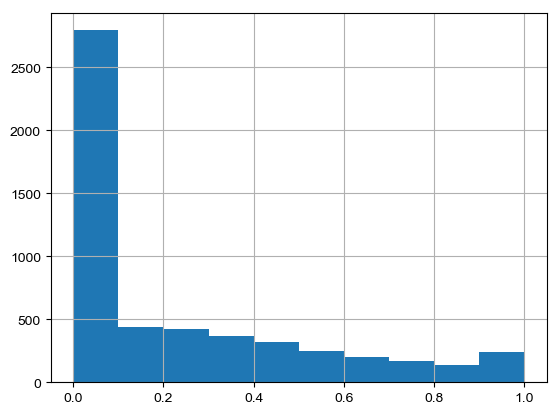

In [107]:
from pybedtools import BedTool

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist[1] = blacklist[1]# - 2**20/2
blacklist[2] = blacklist[2] #+ 2**20/2
blacklist[[1,2]] = blacklist[[1,2]].clip(0).astype(int)

blacklist_bed = BedTool.from_dataframe(blacklist)
afr_altai_comps_bed = BedTool.from_dataframe(afr_altai_comps)

# uncomment if you want to exclude blacklist
#afr_altai_comps_bed = afr_altai_comps_bed.intersect(blacklist_bed,v=True) #3494 out of 5334

#browning
segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
#vernot
#segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
#deserts
#segs = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
#segs = segs.iloc[:,0:3] 
#segs.iloc[:,0] = segs.iloc[:,0].apply(lambda x: 'chr%s' % x)

segs = BedTool.from_dataframe(segs)
intersect = afr_altai_comps_bed.intersect(segs.merge(),wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = list(afr_altai_comps.columns) + ['_','_','_','overlap']

intersect = intersect.groupby(['chr','windowStartPos','end']).agg({'overlap':'sum'}).reset_index()
intersect = afr_altai_comps.merge(intersect, on=['chr','windowStartPos','end'] )
intersect['overlap_percent'] = intersect['overlap']/(intersect['end'] -intersect['windowStartPos'])
intersect.head()
intersect['overlap_percent'].hist()

#### Correlation between coverage and window overlap with introgressed

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 


chr  windowStartPos      end  masked_coverage  AFR_ESN_female_HG03105  \
4   chr1         2097152  3145728         0.735148                0.997018   
5   chr1         2621440  3670016         0.788614                0.998263   
8   chr1         4194304  5242880         0.751086                0.996185   
9   chr1         4718592  5767168         0.762168                0.991800   
10  chr1         5242880  6291456         0.768437                0.997583   

    AFR_GWD_female_HG03539  AFR_LWK_female_NA19378  AFR_MSL_female_HG03212  \
4                 0.996538                0.997372                0.994647   
5                 0.997083                0.996329                0.997459   
8                 0.992321                0.997539                0.998718   
9                 0.990736                0.988684                0.993680   
10                0.996864                0.998123                0.998022   

    AFR_YRI_female_NA18870  AFR_YRI_female_NA19159  overlap  overlap_percent  \
4                 0.988369                0.990681   521410         0.497255   
5                 0.997947                0.997432   711543         0.678580   
8                 0.992224                0.993073   796995         0.760074   
9                 0.988444                0.989545   333618         0.318163   
10                0.996661                0.998246    60911         0.058089   

        mean       max       min  
4   0.994104  0.997372  0.988369  
5   0.997419  0.998263  0.996329  
8   0.995010  0.998718  0.992224  
9   0.990482  0.993680  0.988444  
10  0.997583  0.998246  0.996661

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


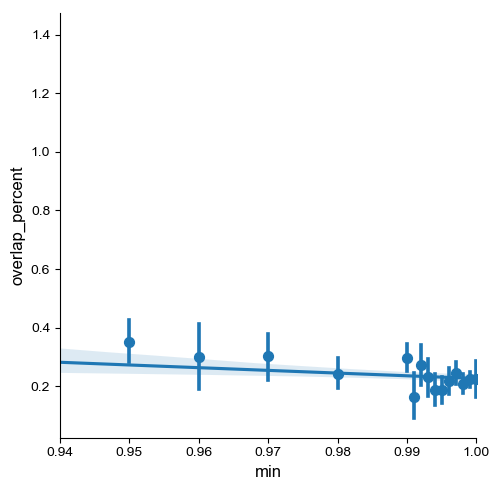

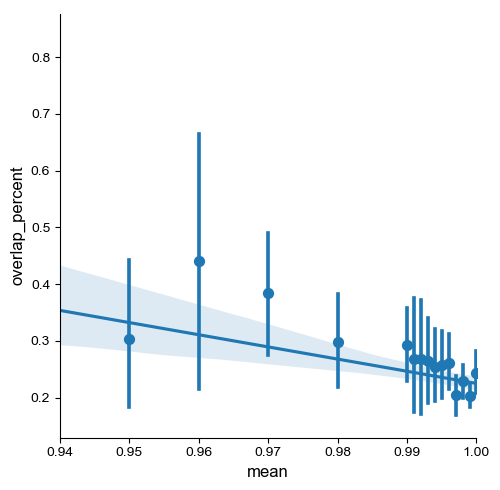

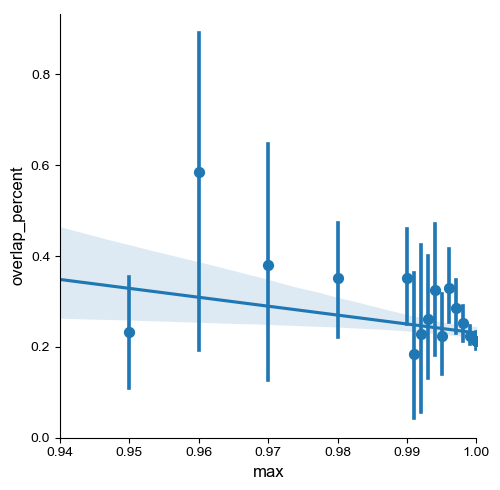

In [108]:
intersect_subset = intersect[intersect['masked_coverage'] > 0.7] # can change
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_subset['max'] = intersect_subset[amh_afr].max(axis=1) 
intersect_subset['min'] = intersect_subset[amh_afr].min(axis=1) 
intersect_subset.head()
#bins = [intersect['mean'].quantile(i) for i in np.arange(0.01,0.5,0.01)]
g = sns.lmplot(x='min',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
g = sns.lmplot(x='mean',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
g = sns.lmplot(x='max',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))

#### Odds ratio of being introgressed/nonintrogressed given different 3d difference thresholds

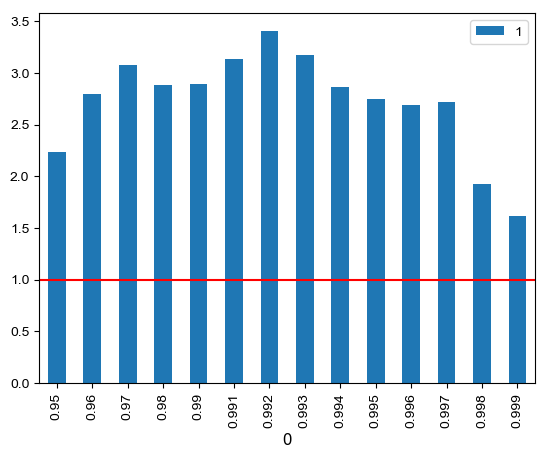

In [105]:
bars = []
intersect_subset = intersect[(intersect['masked_coverage'] > 0.7) ]

for i in [0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    intersect_subset = intersect_subset[(intersect_subset[amh_afr].mean(axis=1) < i)] # can change to max/min
    x = sum(intersect_subset['overlap_percent'] == 0)
    y = sum(intersect_subset['overlap_percent'] == 1)

    intersect_subset = intersect[(intersect[amh_afr].mean(axis=1) > i)] # can change to max/min
    a = sum(intersect_subset['overlap_percent'] == 0)
    b = sum(intersect_subset['overlap_percent'] == 1)
    bars.append((i,(y/x)/(b/a)))
pd.DataFrame(bars).plot.bar(x=0)
plt.axhline(y=1,color='red')

#### Regression approach

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_pos = intersect_subset[(intersect_subset['masked_coverage'] > 0.5) & ((intersect_subset['overlap_percent'] == 1))]
intersect_neg = intersect_subset[(intersect_subset['masked_coverage'] > 0.5) & ((intersect_subset['overlap_percent'] == 0))]
len(intersect_pos)
len(intersect_neg)
intersect_neg = intersect_neg.sample(n = len(intersect_pos))

intersect_subset = pd.concat([intersect_neg, intersect_pos],axis=0)
#intersect_subset['overlap_percent'] = np.ceil(intersect_subset['overlap_percent']) # if you want to round up
intersect_subset.head()

X = intersect_subset[['mean','masked_coverage']].values
y = intersect_subset['overlap_percent']
scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(X)
reg = LogisticRegression().fit(X, y)

reg.score(X, y)
#reg.intercept_
reg.coef_
# lower spearman = higher overlap percent
# more different 3d structure = more tolerant of introgression
# higher spearman = lower overlap percent
# more similar 3d structure = less tolerant of introgression
# higher coverage = higher

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


138

2255

chr  windowStartPos        end  masked_coverage  \
1707  chr5        57147392   58195968         0.717817   
1511  chr4       141557760  142606336         0.679855   
583   chr2        82837504   83886080         0.700094   
1361  chr4        62914560   63963136         0.659805   
2217  chr6       149422080  150470656         0.586378   

      AFR_ESN_female_HG03105  AFR_GWD_female_HG03539  AFR_LWK_female_NA19378  \
1707                0.999489                0.989216                0.999278   
1511                0.999601                0.999619                0.999731   
583                 0.998519                0.998804                0.999146   
1361                0.998481                0.999077                0.999230   
2217                0.999760                0.999153                0.999449   

      AFR_MSL_female_HG03212  AFR_YRI_female_NA18870  AFR_YRI_female_NA19159  \
1707                0.999455                0.988649                0.999310   
1511                0.993288                0.991036                0.999853   
583                 0.998754                0.999588                0.998632   
1361                0.999159                0.999132                0.998974   
2217                0.999536                0.998708                0.999215   

      overlap  overlap_percent      mean  
1707        0              0.0  0.995899  
1511        0              0.0  0.997188  
583         0              0.0  0.998907  
1361        0              0.0  0.999009  
2217        0              0.0  0.999304

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4855072463768116

array([[-0.05753294,  0.05275685]])

#### Histogram/boxplot/violinplot visualization of differences in 3d structure per window based on overlap vs no overlap

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

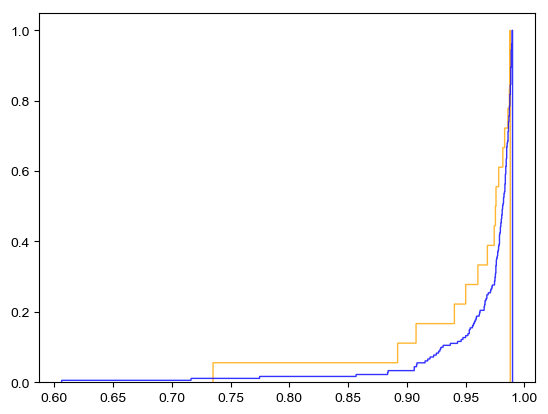

In [120]:
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_subset = intersect_subset[(intersect_subset['overlap_percent'] == 1) & (intersect_subset['mean'] < 0.99)] #change threshold
_ = plt.hist(intersect_subset['mean'] , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='orange',bins=1000)
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_subset = intersect_subset[(intersect_subset['overlap_percent'] == 0) & (intersect_subset['mean'] < 0.99)] # change threshold
_ = plt.hist(intersect_subset['mean'] , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='b',bins=1000)

# regions with introgression overlap=orange
# regions with no introgression overlap = blue


/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


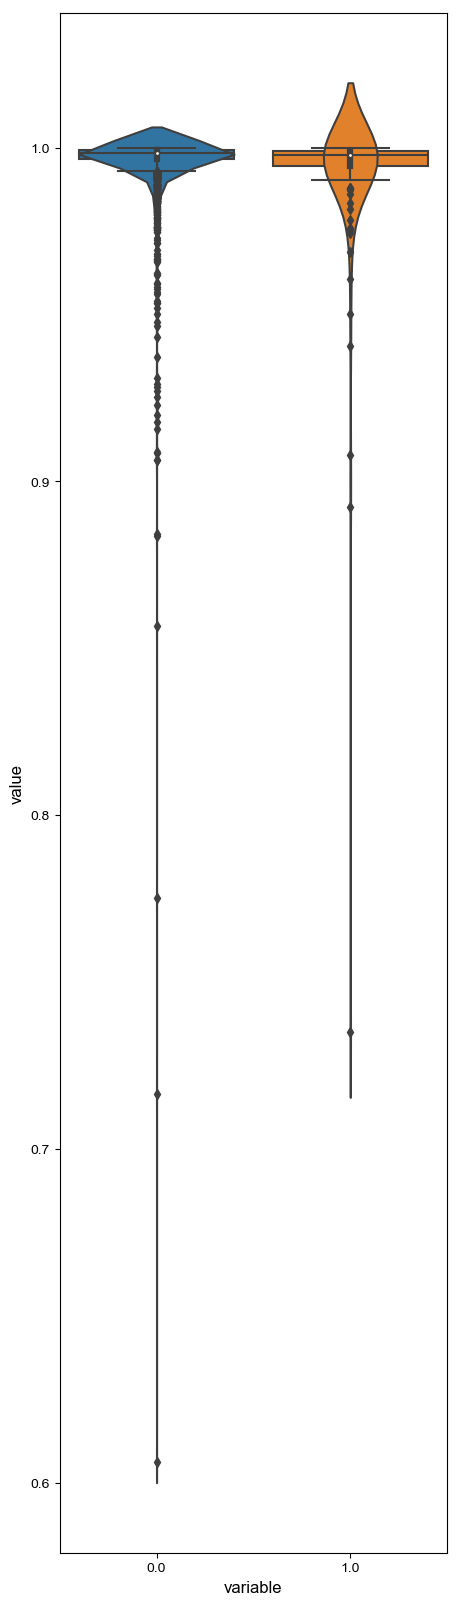

In [126]:
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]

intersect_subset = intersect_subset[(intersect_subset['overlap_percent'] == 0) | (intersect_subset['overlap_percent'] == 1)]#['spearman'].describe() # lower
intersect_subset.index = list(intersect_subset[['overlap_percent']].values.flatten())
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
fig = plt.figure(figsize=(5,20))
sns.violinplot(x='variable',y='value',data=intersect_subset[['mean']].T.melt())

sns.boxplot(x='variable',y='value',data=intersect_subset[['mean']].T.melt())

# regions with evidence of introgression have more 3d structure divergence from neanderthals than non-introgressed
# more desert overlap = more similar 3d structure

# regions with introgression overlap=orange
# regions with no introgression overlap = blue

### Focus on "segment"-level

In [46]:
from pybedtools import BedTool
afr_altai_comps = pd.DataFrame([], columns=['chr','windowStartPos','masked_coverage'])
for i in amh_afr:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman','masked_coverage']]
    pair.columns = ['chr','windowStartPos',i,'masked_coverage']
    afr_altai_comps = afr_altai_comps.merge(pair, on =['chr','windowStartPos','masked_coverage'],how='outer')
afr_altai_comps['end'] = afr_altai_comps['windowStartPos']+2**20
afr_altai_comps = afr_altai_comps[['chr','windowStartPos','end','masked_coverage'] + amh_afr]
afr_altai_comps['mean'] = afr_altai_comps[amh_afr].mean(axis=1) 
afr_altai_comps_bed = BedTool.from_dataframe(afr_altai_comps)

#browning
segs_df = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
#vernot
#segs_df = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
#segs_df = segs_df.iloc[:,0:3] 
#deserts
#segs_df = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
#segs_df = segs_df.iloc[:,0:3] 
#segs_df.iloc[:,0] = segs_df.iloc[:,0].apply(lambda x: 'chr%s' % x)

segs_df.columns = ['chrm','start','stop']
segs = BedTool.from_dataframe(segs_df)
intersect = segs.intersect(afr_altai_comps_bed,wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = ['chrm','start','stop'] + list(afr_altai_comps.columns) + ['overlap']

intersect = intersect.groupby(['chrm','start','stop']).agg({'mean':'min'}).reset_index() #can change 'min'
intersect = segs_df.merge(intersect, on=['chrm','start','stop'] )
len(segs_df) == len(intersect)
try:
    len(intersect[intersect['mean'] == '.']) #!check why these don't have any window overlap
    intersect = intersect[intersect['mean'] != '.']
except:
    pass

intersect.head()

True

29

chrm    start     stop                mean
0  chr1  2369230  2632289    0.99802152899054
2  chr1  4004406  4835531  0.9904815084270072
3  chr1  5023290  5081951  0.9904815084270072
4  chr1  5145773  5303791  0.9904815084270072
5  chr1  9512228  9704296  0.9964164068321621

In [47]:
# Shuffle background
segs_shuffle = segs.shuffle(genome='hg19', seed=42)
segs_shuffle_df = segs_shuffle.to_dataframe()
segs_shuffle_df.columns = ['chrm','start','stop']
intersect_shuffle = segs_shuffle.intersect(afr_altai_comps_bed,wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect_shuffle.columns = ['chrm','start','stop'] + list(afr_altai_comps.columns) + ['overlap']
intersect_shuffle = intersect_shuffle.groupby(['chrm','start','stop']).agg({'mean':'min'}).reset_index()
intersect_shuffle = segs_shuffle_df.merge(intersect_shuffle, on=['chrm','start','stop'] )
len(segs_shuffle_df) == len(intersect_shuffle)
try:
    len(intersect_shuffle[intersect_shuffle['mean'] == '.']) #!check why these don't have any window overlap
    intersect_shuffle = intersect_shuffle[intersect_shuffle['mean'] != '.']
except:
    pass

True

170

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


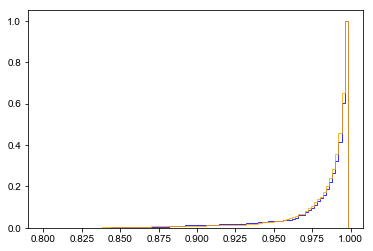

In [48]:
_ = plt.hist([float(i) for i in intersect_shuffle[['mean']].values.flatten()], normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='b',bins = np.arange(0.8,1,0.002))
_ = plt.hist([float(i) for i in intersect[['mean']].values.flatten()] , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='orange',bins = np.arange(0.8,1,0.002))

### Relationship between haplotype frequency and 3d genome similarity between Altai-AFR

In [50]:
intersect.head()

chrm    start     stop       AFA      AFR      AMR       EAS       EUR  \
0  chr1  2903158  2996556  0.028665  0.00198  0.20389  0.198415  0.132705   
1  chr1  3015134  3046826  0.012740  0.00000  0.03026  0.067460  0.063620   
2  chr1  3066509  3209504  0.003180  0.00000  0.03026  0.100200  0.005960   
3  chr1  3301585  3335874  0.003180  0.00000  0.00288  0.007940  0.010930   
4  chr1  3352783  3450985  0.023885  0.00000  0.14697  0.140375  0.058650   

       PNG      SAS   ...    end  masked_coverage AFR_ESN_female_HG03105  \
0  0.00926  0.03885   ...     -1                .                      .   
1  0.00000  0.03272   ...     -1                .                      .   
2  0.07407  0.07975   ...     -1                .                      .   
3  0.00000  0.04090   ...     -1                .                      .   
4  0.12963  0.10327   ...     -1                .                      .   

   AFR_GWD_female_HG03539  AFR_LWK_female_NA19378 AFR_MSL_female_HG03212  \
0                       .                       .                      .   
1                       .                       .                      .   
2                       .                       .                      .   
3                       .                       .                      .   
4                       .                       .                      .   

  AFR_YRI_female_NA18870 AFR_YRI_female_NA19159 mean overlap  
0                      .                      .    .       0  
1                      .                      .    .       0  
2                      .                      .    .       0  
3                      .                      .    .       0  
4                      .                      .    .       0  

[5 rows x 24 columns]

In [63]:
from pybedtools import BedTool
afr_altai_comps = pd.DataFrame([], columns=['chr','windowStartPos','masked_coverage'])
for i in amh_afr:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman','masked_coverage']]
    pair.columns = ['chr','windowStartPos',i,'masked_coverage']
    afr_altai_comps = afr_altai_comps.merge(pair, on =['chr','windowStartPos','masked_coverage'],how='outer')
afr_altai_comps['end'] = afr_altai_comps['windowStartPos']+2**20
afr_altai_comps = afr_altai_comps[['chr','windowStartPos','end','masked_coverage'] + amh_afr]
afr_altai_comps['mean'] = afr_altai_comps[amh_afr].mean(axis=1) 
afr_altai_comps_bed = BedTool.from_dataframe(afr_altai_comps)

#vernot
segs_df = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
segs_df.columns = ['chrm','start','stop','AFA','AFR','AMR','EAS','EUR','PNG','SAS','numSnps','hapLen']


segs = BedTool.from_dataframe(segs_df)
intersect = segs.intersect(afr_altai_comps_bed,wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = ['chrm','start','stop'] + list(segs_df.columns)[3:] + list(afr_altai_comps.columns) + ['overlap'] 
len(intersect[intersect['mean'] == "."]) #!check why these don't have any window overlap
intersect = intersect[intersect['mean'] != "."]
intersect['mean'] = pd.to_numeric(intersect['mean'])
intersect = intersect.groupby(['chrm','start','stop']).agg({'mean':'mean'}).reset_index() #can change 'min'
intersect = segs_df.merge(intersect, on=['chrm','start','stop'] )
len(segs_df) == len(intersect)


intersect.head()

144

False

chrm    start     stop      AFA      AFR      AMR      EAS      EUR  \
0  chr1  4165583  4277602  0.00318  0.00000  0.02233  0.04067  0.03479   
1  chr1  4440620  4478442  0.02229  0.00099  0.14697  0.10020  0.08350   
2  chr1  4489344  4504571  0.03822  0.00397  0.32133  0.05853  0.15308   
3  chr1  4529573  4631404  0.02229  0.00298  0.09942  0.02778  0.16203   
4  chr1  4857794  4882004  0.00000  0.00000  0.00000  0.00595  0.00497   

       PNG      SAS  numSnps  hapLen      mean  
0  0.00000  0.07055      113  123636  0.995010  
1  0.01852  0.10532       85   63330  0.995010  
2  0.00000  0.15644       30   26581  0.995010  
3  0.07407  0.10634      104  103633  0.995010  
4  0.00000  0.08896       16   27857  0.992746

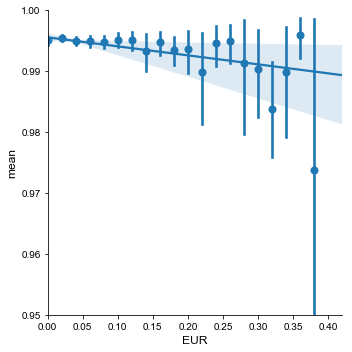

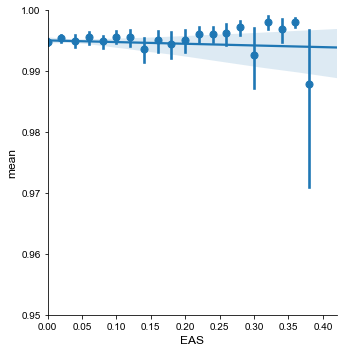

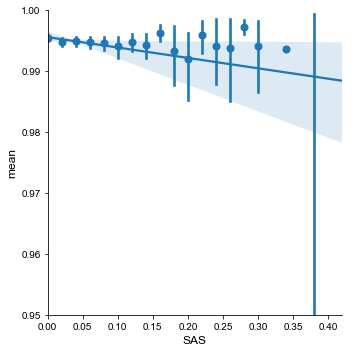

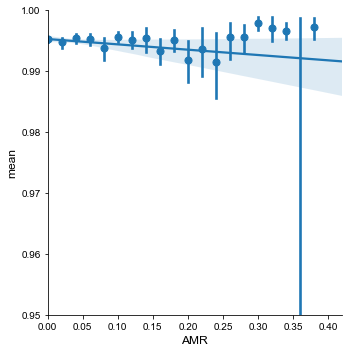

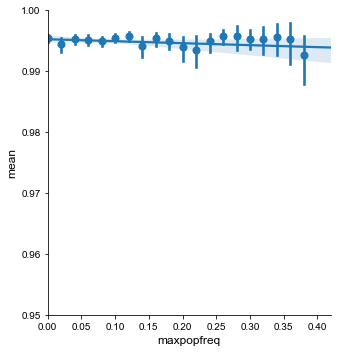

In [67]:
intersect['mean'] = pd.to_numeric(intersect['mean'])
intersect['maxpopfreq'] = intersect[['AMR','EAS','EUR','PNG','SAS']].max(axis=1)
g = sns.lmplot(x='EUR',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='EAS',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='SAS',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='AMR',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='maxpopfreq',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

## 3d Variable regions in AFR

In [349]:
## read in AFR-AFR (non harmonized pairs)

coverage = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_AFR_GWD_female_HG03539.txt",sep="\t",header=None)
coverage.columns= ['chr','windowStartPos','coverage','masked_coverage']
regionsToKeep = coverage[coverage['coverage'] == 1][['chr','windowStartPos']]
len(regionsToKeep) # only keep regions with full coverage in 1kg!!

# This takes a few minutes
indivs_afr = ['AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212']

pairs_afr = {}
for i1 in indivs_afr:
    print(i1)
    for i2 in indivs_afr:
        try:
            pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/afr_nonHarmonized/pairwiseComparisons/3dcomp_%s_vs_%s.txt" % (i1,i2),sep="\t")
            coverage1 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/afr_nonHarmonized/coveragePerIndiv/coverage_%s.txt" % i1,sep="\t",header=None)
            coverage1.columns = ['chr','windowStartPos','%s_coverage'% i1]
            coverage2 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/afr_nonHarmonized/coveragePerIndiv/coverage_%s.txt" % i2,sep="\t",header=None)
            coverage2.columns = ['chr','windowStartPos','%s_coverage'% i2]
            pair = pair.merge(coverage1).merge(coverage2)
            pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos']) # only keep windows with full coverage in 1kg
            pairs_afr[(i1,i2)] = pair
        except FileNotFoundError:
            pass

len(pairs_afr) # should be 6 when all pair-wise comparisons are finished


4999

AFR_ESN_female_HG03105
AFR_GWD_female_HG03539
AFR_LWK_female_NA19378
AFR_MSL_female_HG03212


6

In [350]:
afr_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
afr_comps_keys =[]
for k,v in pairs_afr.items():
    pair = v[['chr','windowStartPos','spearman']]
    pair.columns = ['chr','windowStartPos','_'.join(k)]
    afr_comps = afr_comps.merge(pair, on =['chr','windowStartPos'],how='outer')
    afr_comps_keys.append('_'.join(k)) 
    
afr_comps['end'] = afr_comps['windowStartPos'] + 2**20
afr_comps = afr_comps[['chr','windowStartPos','end'] + afr_comps_keys]
afr_comps[afr_comps['chr'] == 'chr18'].head()
afr_comps_keys


chr  windowStartPos      end  \
4306  chr18          524288  1572864   
4307  chr18         1048576  2097152   
4308  chr18         1572864  2621440   
4309  chr18         2097152  3145728   
4310  chr18         2621440  3670016   

      AFR_GWD_female_HG03539_AFR_ESN_female_HG03105  \
4306                                       0.999806   
4307                                       0.997293   
4308                                       0.993556   
4309                                       0.998145   
4310                                       0.998619   

      AFR_LWK_female_NA19378_AFR_ESN_female_HG03105  \
4306                                       0.999605   
4307                                       0.998667   
4308                                       0.989473   
4309                                       0.996914   
4310                                       0.998907   

      AFR_LWK_female_NA19378_AFR_GWD_female_HG03539  \
4306                                       0.999735   
4307                                       0.997489   
4308                                       0.996918   
4309                                       0.997056   
4310                                       0.997679   

      AFR_MSL_female_HG03212_AFR_ESN_female_HG03105  \
4306                                       0.999056   
4307                                       0.994071   
4308                                       0.996037   
4309                                       0.998749   
4310                                       0.999530   

      AFR_MSL_female_HG03212_AFR_GWD_female_HG03539  \
4306                                       0.999223   
4307                                       0.998441   
4308                                       0.994499   
4309                                       0.997927   
4310                                       0.998321   

      AFR_MSL_female_HG03212_AFR_LWK_female_NA19378  
4306                                       0.999623  
4307                                       0.994956  
4308                                       0.989933  
4309                                       0.997540  
4310                                       0.998675

['AFR_GWD_female_HG03539_AFR_ESN_female_HG03105',
 'AFR_LWK_female_NA19378_AFR_ESN_female_HG03105',
 'AFR_LWK_female_NA19378_AFR_GWD_female_HG03539',
 'AFR_MSL_female_HG03212_AFR_ESN_female_HG03105',
 'AFR_MSL_female_HG03212_AFR_GWD_female_HG03539',
 'AFR_MSL_female_HG03212_AFR_LWK_female_NA19378']

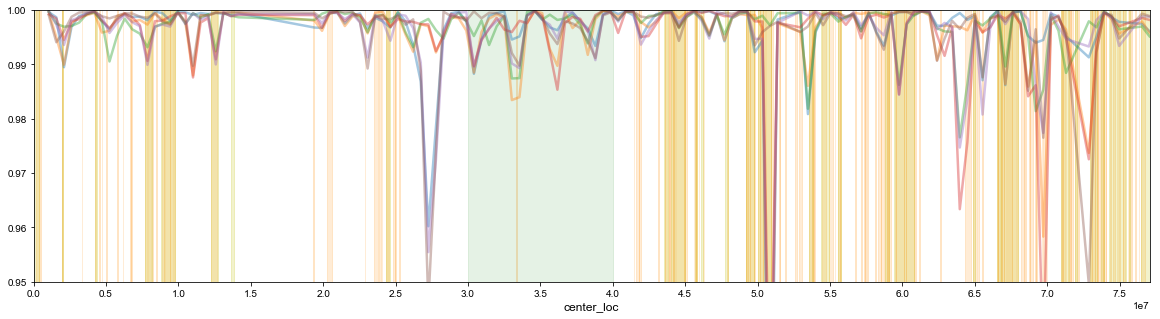

In [85]:
# adjust these
chrm = 'chr18'
pair = afr_comps


fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

#start = 50500000 # adjust
#end = 51500000 #adjust


num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
_ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=afr_comps_keys, ax=ax, alpha=0.4, linewidth=2.5)

maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks(np.arange(0,maxLoc,5000000))
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.92,1)
#plt.show()


#fig = plt.figure(figsize=(20,5))
#ax = fig.add_subplot(111)

# Read in vernot, browning segments and sankararaman deserts
vernot_segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
vernot_segs = vernot_segs[vernot_segs[0]==chrm]
vernot_segs['len'] = vernot_segs[2] - vernot_segs[1]
_ = plt.broken_barh([(i,j) for i,j in zip(vernot_segs[1],vernot_segs['len'])], (0,1),color='darkorange',alpha=0.16)

sprime_segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
sprime_segs = sprime_segs[sprime_segs[0]==chrm]
sprime_segs['len'] = sprime_segs[2] - sprime_segs[1]
_ = plt.broken_barh([(i,j) for i,j in zip(sprime_segs[1],sprime_segs['len'])], (0,1),color='y',alpha=0.2)

deserts = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
deserts.iloc[:,0] = deserts.iloc[:,0].apply(lambda x: 'chr%s' % x)
deserts['len'] = deserts[2] - deserts[1]
deserts = deserts[deserts[0]==chrm]
_ = plt.broken_barh([(i,j) for i,j in zip(deserts[1],deserts['len'])], (0,1),color='g',alpha=0.1)

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist = blacklist[blacklist[0]==chrm]
blacklist[1] = blacklist[1] - 2**20/2
blacklist[2] = blacklist[2] + 2**20/2
blacklist['len'] = blacklist[2] - blacklist[1]
#_ = plt.broken_barh([(i,j) for i,j in zip(blacklist[1],blacklist['len'])], (0,1),color='k',alpha=0.2)

_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.95,1)

_ = ax.set_xticks(np.arange(0,maxLoc,5000000))


plt.show()

### Focus on "window"-level

chr  windowStartPos      end  \
0  chr1          524288  1572864   
1  chr1         1048576  2097152   
2  chr1         1572864  2621440   
3  chr1         4194304  5242880   
4  chr1         4718592  5767168   

   AFR_GWD_female_HG03539_AFR_ESN_female_HG03105  \
0                                       0.998443   
1                                       0.993556   
2                                       0.997456   
3                                       0.987375   
4                                       0.981955   

   AFR_LWK_female_NA19378_AFR_ESN_female_HG03105  \
0                                       0.998733   
1                                       0.998729   
2                                       0.996903   
3                                       0.997893   
4                                       0.996218   

   AFR_LWK_female_NA19378_AFR_GWD_female_HG03539  \
0                                       0.997649   
1                                       0.994205   
2                                       0.996111   
3                                       0.985601   
4                                       0.980396   

   AFR_MSL_female_HG03212_AFR_ESN_female_HG03105  \
0                                       0.998584   
1                                       0.997439   
2                                       0.999408   
3                                       0.995625   
4                                       0.997398   

   AFR_MSL_female_HG03212_AFR_GWD_female_HG03539  \
0                                       0.998332   
1                                       0.987339   
2                                       0.996139   
3                                       0.992595   
4                                       0.987696   

   AFR_MSL_female_HG03212_AFR_LWK_female_NA19378  overlap  overlap_percent  
0                                       0.997704        0         0.000000  
1                                       0.996797        0         0.000000  
2                                       0.996671   252210         0.240526  
3                                       0.993823   796995         0.760074  
4                                       0.995537   333618         0.318163

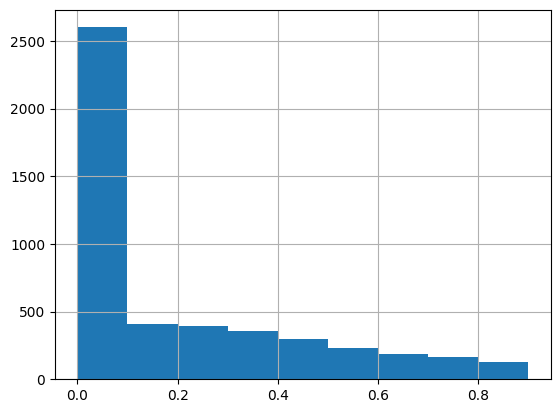

In [401]:

from pybedtools import BedTool

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist[1] = blacklist[1]# - 2**20/2
blacklist[2] = blacklist[2] #+ 2**20/2
blacklist[[1,2]] = blacklist[[1,2]].clip(0).astype(int)

blacklist_bed = BedTool.from_dataframe(blacklist)
afr_comps_bed = BedTool.from_dataframe(afr_comps)

# uncomment if you want to exclude blacklist
#afr_comps_bed = afr_comps_bed.intersect(blacklist_bed,v=True) #3494 out of 5334

#browning
segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
#vernot
#segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
#deserts
#segs = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
#segs = segs.iloc[:,0:3]
#segs.iloc[:,0] = segs.iloc[:,0].apply(lambda x: 'chr%s' % x)
#segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_3d/zooCHARs_named_all.sorted.bed',sep="\t",header=None)
#segs2 = pd.read_csv('/dors/capra_lab/users/evonne/nean_3d/zooHARs_named_all.sorted.bed',sep="\t",header=None)
#segs = pd.concat([segs, segs2],axis=0)
segs = BedTool.from_dataframe(segs).sort()

intersect = afr_comps_bed.intersect(segs.merge(),wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = list(afr_comps.columns) + ['_','_','_','overlap']

intersect = intersect.groupby(['chr','windowStartPos','end']).agg({'overlap':'sum'}).reset_index()
intersect = afr_comps.merge(intersect, on=['chr','windowStartPos','end'] )
intersect['overlap_percent'] = intersect['overlap']/(intersect['end'] -intersect['windowStartPos'])
intersect.head()
intersect['overlap_percent'].hist(bins= np.arange(0,1,0.1))

#### Histogram/boxplot/violinplot visualization of differences in 3d structure per window based on overlap vs no overlap

chr  windowStartPos      end  \
0  chr1          524288  1572864   
1  chr1         1048576  2097152   
2  chr1         1572864  2621440   
3  chr1         4194304  5242880   
4  chr1         4718592  5767168   

   AFR_GWD_female_HG03539_AFR_ESN_female_HG03105  \
0                                       0.998443   
1                                       0.993556   
2                                       0.997456   
3                                       0.987375   
4                                       0.981955   

   AFR_LWK_female_NA19378_AFR_ESN_female_HG03105  \
0                                       0.998733   
1                                       0.998729   
2                                       0.996903   
3                                       0.997893   
4                                       0.996218   

   AFR_LWK_female_NA19378_AFR_GWD_female_HG03539  \
0                                       0.997649   
1                                       0.994205   
2                                       0.996111   
3                                       0.985601   
4                                       0.980396   

   AFR_MSL_female_HG03212_AFR_ESN_female_HG03105  \
0                                       0.998584   
1                                       0.997439   
2                                       0.999408   
3                                       0.995625   
4                                       0.997398   

   AFR_MSL_female_HG03212_AFR_GWD_female_HG03539  \
0                                       0.998332   
1                                       0.987339   
2                                       0.996139   
3                                       0.992595   
4                                       0.987696   

   AFR_MSL_female_HG03212_AFR_LWK_female_NA19378  overlap  overlap_percent  \
0                                       0.997704        0         0.000000   
1                                       0.996797        0         0.000000   
2                                       0.996671   252210         0.240526   
3                                       0.993823   796995         0.760074   
4                                       0.995537   333618         0.318163   

       mean  
0  0.997649  
1  0.987339  
2  0.996111  
3  0.985601  
4  0.980396

144

2322

2533

<Figure size 500x350 with 0 Axes>

(0.0, 0.5)

(0.9, 1.0)

0.0016149991691735144

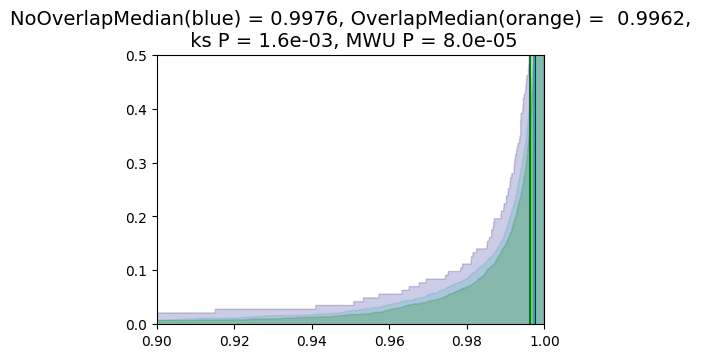

In [394]:
intersect_subset = intersect
intersect_subset['mean'] = intersect_subset[afr_comps_keys].min(axis=1)  # can change to min/max/mean
intersect_subset.head()
full_overlap = intersect_subset[(intersect_subset['overlap_percent'] >= 1)]['mean'].values # 0.8 for vernot
no_overlap = intersect_subset[(intersect_subset['overlap_percent'] == 0)]['mean'].values
partial_overlap = intersect_subset[(intersect_subset['overlap_percent'] > 0) & (intersect_subset['overlap_percent'] < 1)]['mean'].values #< 0.8 for vernot
len(full_overlap)
len(no_overlap)
len(partial_overlap)
plt.figure(figsize=(5,3.5))
_ = plt.hist(full_overlap , density=True, cumulative=True, label='CDF',
         histtype='step', color='darkblue',bins=np.arange(0.7,1,0.0001),fill='darkblue',alpha=0.2)
_ = plt.hist(partial_overlap , density=True, cumulative=True, label='CDF',
         histtype='step', color='lightseagreen',bins=np.arange(0.7,1,0.0001),fill='lightseagreen',alpha=0.2)
_ = plt.hist(no_overlap , density=True, cumulative=True, label='CDF',
         histtype='step',  color='g',bins=np.arange(0.7,1,0.0001), fill='g',alpha=0.2)

plt.ylim((None, .5)) 
plt.xlim((0.9, 1)) 



ksP = stats.ks_2samp(no_overlap, full_overlap)
ksP[1]
mwuP = stats.mannwhitneyu(no_overlap, full_overlap)
noOverlapMed = np.median(no_overlap)
overlapMed = np.median(full_overlap)

plt.axvline(x=np.median(no_overlap),c='darkblue')
plt.axvline(x=np.median(partial_overlap),c='lightseagreen')

plt.axvline(x=np.median(full_overlap),c='g')


_ = plt.title('NoOverlapMedian(blue) = %0.4f, OverlapMedian(orange) =  %0.4f,\n ks P = %0.1e, MWU P = %0.1e' % (noOverlapMed, overlapMed, ksP[1], mwuP[1]))

# regions with introgression overlap=orange
# regions with no introgression overlap = blue

plt.savefig('/home/mcarthe/overlap.pdf')

In [397]:
intersect.head()

chrm    start     stop       AFA      AFR      AMR       EAS       EUR  \
0  chr1  2903158  2996556  0.028665  0.00198  0.20389  0.198415  0.132705   
1  chr1  3015134  3046826  0.012740  0.00000  0.03026  0.067460  0.063620   
2  chr1  3066509  3209504  0.003180  0.00000  0.03026  0.100200  0.005960   
3  chr1  3301585  3335874  0.003180  0.00000  0.00288  0.007940  0.010930   
4  chr1  3352783  3450985  0.023885  0.00000  0.14697  0.140375  0.058650   

       PNG      SAS  ...  windowStartPos  end  \
0  0.00926  0.03885  ...              -1   -1   
1  0.00000  0.03272  ...              -1   -1   
2  0.07407  0.07975  ...              -1   -1   
3  0.00000  0.04090  ...              -1   -1   
4  0.12963  0.10327  ...              -1   -1   

  AFR_GWD_female_HG03539_AFR_ESN_female_HG03105  \
0                                             .   
1                                             .   
2                                             .   
3                                             .   
4                                             .   

   AFR_LWK_female_NA19378_AFR_ESN_female_HG03105  \
0                                              .   
1                                              .   
2                                              .   
3                                              .   
4                                              .   

   AFR_LWK_female_NA19378_AFR_GWD_female_HG03539  \
0                                              .   
1                                              .   
2                                              .   
3                                              .   
4                                              .   

  AFR_MSL_female_HG03212_AFR_ESN_female_HG03105  \
0                                             .   
1                                             .   
2                                             .   
3                                             .   
4                                             .   

  AFR_MSL_female_HG03212_AFR_GWD_female_HG03539  \
0                                             .   
1                                             .   
2                                             .   
3                                             .   
4                                             .   

  AFR_MSL_female_HG03212_AFR_LWK_female_NA19378 overlap      mean  
0                                             .       0  0.997649  
1                                             .       0  0.987339  
2                                             .       0  0.996111  
3                                             .       0  0.985601  
4                                             .       0  0.980396  

[5 rows x 23 columns]

In [402]:
#vernot
segs_df = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
segs_df.columns = ['chrm','start','stop','AFA','AFR','AMR','EAS','EUR','PNG','SAS','numSnps','hapLen']



segs = BedTool.from_dataframe(segs_df)
intersect = segs.intersect(afr_comps_bed,wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = ['chrm','start','stop'] + list(segs_df.columns)[3:] + list(afr_comps.columns) + ['overlap'] 
intersect['mean'] = intersect[afr_comps_keys].min(axis=1)
len(intersect[intersect['mean'] == "."]) #!check why these don't have any window overlap
intersect = intersect[intersect['mean'] != "."]
intersect['mean'] = pd.to_numeric(intersect['mean'])
intersect = intersect.groupby(['chrm','start','stop']).agg({'mean':'mean'}).reset_index() #can change 'min'
intersect = segs_df.merge(intersect, on=['chrm','start','stop'] )
len(segs_df) == len(intersect)


intersect.head()

144

False

chrm    start     stop      AFA      AFR      AMR      EAS      EUR  \
0  chr1  4165583  4277602  0.00318  0.00000  0.02233  0.04067  0.03479   
1  chr1  4440620  4478442  0.02229  0.00099  0.14697  0.10020  0.08350   
2  chr1  4489344  4504571  0.03822  0.00397  0.32133  0.05853  0.15308   
3  chr1  4529573  4631404  0.02229  0.00298  0.09942  0.02778  0.16203   
4  chr1  4857794  4882004  0.00000  0.00000  0.00000  0.00595  0.00497   

       PNG      SAS  numSnps  hapLen      mean  
0  0.00000  0.07055      113  123636  0.985601  
1  0.01852  0.10532       85   63330  0.985601  
2  0.00000  0.15644       30   26581  0.985601  
3  0.07407  0.10634      104  103633  0.985601  
4  0.00000  0.08896       16   27857  0.982999

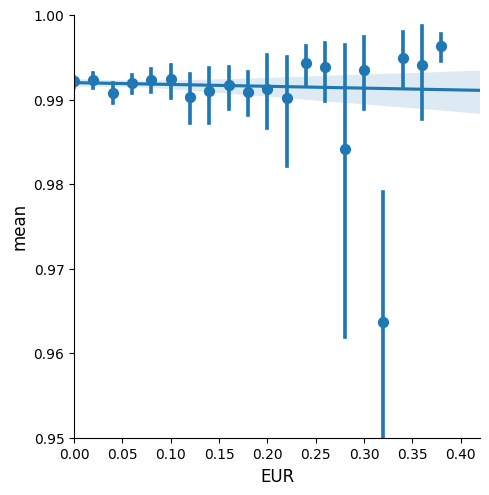

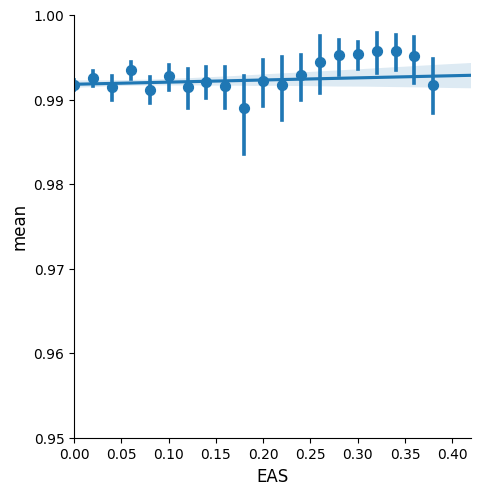

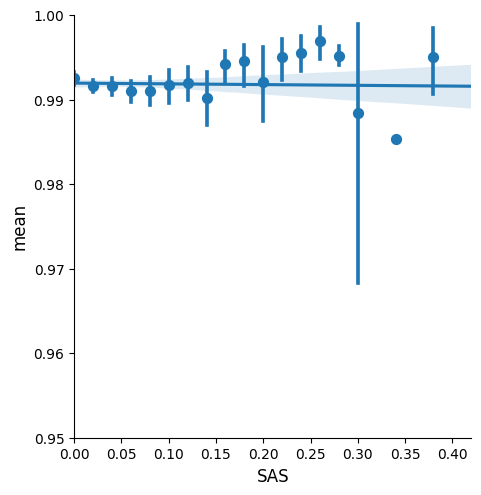

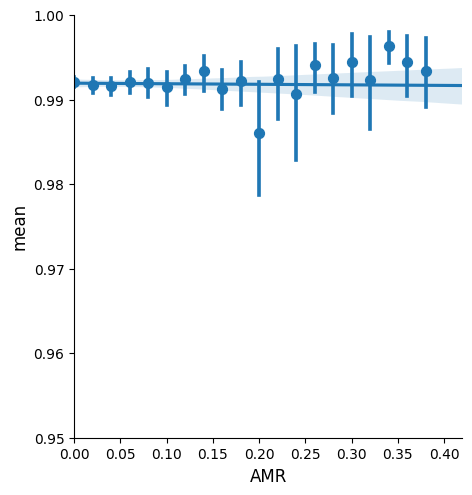

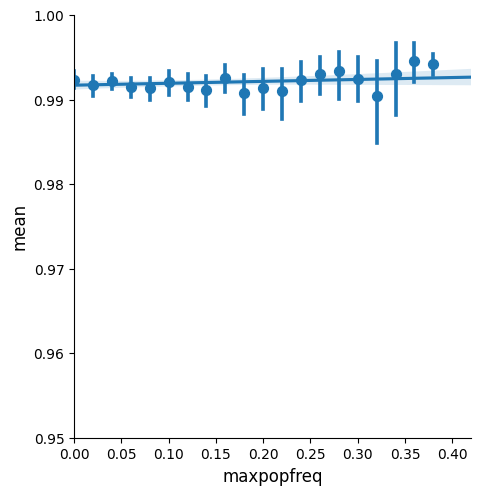

In [403]:
intersect['mean'] = pd.to_numeric(intersect['mean'])
intersect['maxpopfreq'] = intersect[['AMR','EAS','EUR','PNG','SAS']].max(axis=1)
g = sns.lmplot(x='EUR',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='EAS',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='SAS',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='AMR',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='maxpopfreq',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

#### Correlation between coverage and window overlap with introgressed

chr  windowStartPos      end  \
0  chr1          524288  1572864   
1  chr1         1048576  2097152   
2  chr1         1572864  2621440   
3  chr1         4194304  5242880   
4  chr1         4718592  5767168   

   AFR_LWK_female_NA19378_AFR_ESN_female_HG03105  \
0                                       0.998733   
1                                       0.998729   
2                                       0.996903   
3                                       0.997893   
4                                       0.996218   

   AFR_MSL_female_HG03212_AFR_LWK_female_NA19378  \
0                                       0.997704   
1                                       0.996797   
2                                       0.996671   
3                                       0.993823   
4                                       0.995537   

   AFR_LWK_female_NA19378_AFR_GWD_female_HG03539  \
0                                       0.997649   
1                                       0.994205   
2                                       0.996111   
3                                       0.985601   
4                                       0.980396   

   AFR_MSL_female_HG03212_AFR_GWD_female_HG03539  \
0                                       0.998332   
1                                       0.987339   
2                                       0.996139   
3                                       0.992595   
4                                       0.987696   

   AFR_GWD_female_HG03539_AFR_ESN_female_HG03105  \
0                                       0.998443   
1                                       0.993556   
2                                       0.997456   
3                                       0.987375   
4                                       0.981955   

   AFR_MSL_female_HG03212_AFR_ESN_female_HG03105  overlap  overlap_percent  \
0                                       0.998584        0         0.000000   
1                                       0.997439        0         0.000000   
2                                       0.999408   252210         0.240526   
3                                       0.995625   796995         0.760074   
4                                       0.997398   333618         0.318163   

       mean       max       min  
0  0.998241  0.998733  0.997649  
1  0.994678  0.998729  0.987339  
2  0.997115  0.999408  0.996111  
3  0.992152  0.997893  0.985601  
4  0.989867  0.997398  0.980396

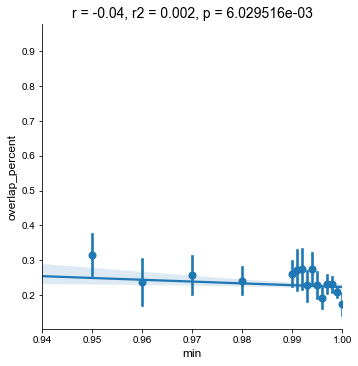

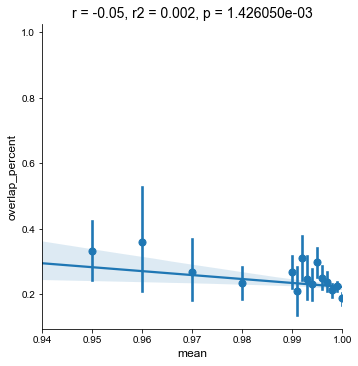

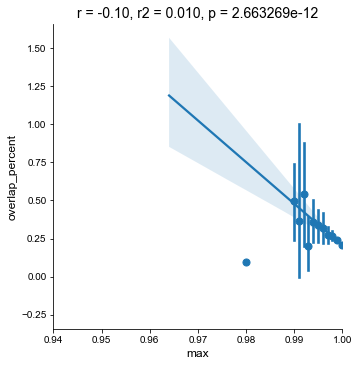

In [92]:
intersect_subset = intersect
intersect_subset['mean'] = intersect_subset[afr_comps_keys].mean(axis=1) 
intersect_subset['max'] = intersect_subset[afr_comps_keys].max(axis=1) 
intersect_subset['min'] = intersect_subset[afr_comps_keys].min(axis=1) 
intersect_subset.head()
#bins = [intersect['mean'].quantile(i) for i in np.arange(0.01,0.5,0.01)]
g = sns.lmplot(x='min',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
slope, intercept, r, p, se = stats.linregress(intersect_subset['min'].values, intersect_subset['overlap_percent'].values)
_ = plt.title('r = %0.2f, r2 = %0.3f, p = %e' % (r, r**2, p))


g = sns.lmplot(x='mean',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
slope, intercept, r, p, se = stats.linregress(intersect_subset['mean'].values, intersect_subset['overlap_percent'].values)
_ = plt.title('r = %0.2f, r2 = %0.3f, p = %e' % (r, r**2, p))

g = sns.lmplot(x='max',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
slope, intercept, r, p, se = stats.linregress(intersect_subset['max'].values, intersect_subset['overlap_percent'].values)
_ = plt.title('r = %0.2f, r2 = %0.3f, p = %e' % (r, r**2, p))

#### Regression approach

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
intersect_subset = intersect
intersect_subset['mean'] = intersect_subset[afr_comps_keys].mean(axis=1) 
intersect_pos = intersect_subset[(intersect_subset['overlap_percent'] == 1)]
#intersect_pos = intersect_subset[(intersect_subset['overlap_percent'] > 0.8)]
#intersect_pos['overlap_percent'] = 1
intersect_neg = intersect_subset[(intersect_subset['overlap_percent'] == 0)]
len(intersect_pos)
len(intersect_neg)
#intersect_neg = intersect_neg.sample(n = len(intersect_pos))

intersect_subset = pd.concat([intersect_neg, intersect_pos],axis=0)
#intersect_subset['overlap_percent'] = np.ceil(intersect_subset['overlap_percent']) # if you want to round up
intersect_subset.head()

X = intersect_subset[['mean']].values
y = intersect_subset['overlap_percent']
scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(X)
reg = LogisticRegression().fit(X, y)

reg.score(X, y)
reg.intercept_
reg.coef_
# negative = less 3d similar = more introgression

15

1438

chr  windowStartPos      end  \
0  chr1          524288  1572864   
1  chr1         1048576  2097152   
2  chr1         1572864  2621440   
6  chr1         5767168  6815744   
7  chr1         6291456  7340032   

   AFR_LWK_female_NA19378_AFR_GWD_female_HG03539  \
0                                       0.997649   
1                                       0.994205   
2                                       0.996111   
6                                       0.999000   
7                                       0.999278   

   AFR_LWK_female_NA19378_AFR_ESN_female_HG03105  \
0                                       0.998733   
1                                       0.998729   
2                                       0.996903   
6                                       0.994810   
7                                       0.998756   

   AFR_GWD_female_HG03539_AFR_ESN_female_HG03105  \
0                                       0.998443   
1                                       0.993556   
2                                       0.997456   
6                                       0.991671   
7                                       0.998751   

   AFR_MSL_female_HG03212_AFR_LWK_female_NA19378  \
0                                       0.997704   
1                                       0.996797   
2                                       0.996671   
6                                       0.997554   
7                                       0.998134   

   AFR_MSL_female_HG03212_AFR_ESN_female_HG03105  \
0                                       0.998584   
1                                       0.997439   
2                                       0.999408   
6                                       0.997094   
7                                       0.999350   

   AFR_MSL_female_HG03212_AFR_GWD_female_HG03539  overlap  overlap_percent  \
0                                       0.998332        0              0.0   
1                                       0.987339        0              0.0   
2                                       0.996139        0              0.0   
6                                       0.995658        0              0.0   
7                                       0.998081        0              0.0   

       mean  
0  0.998241  
1  0.994678  
2  0.997115  
6  0.995964  
7  0.998725

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9896765313145217

array([-4.35391465])

array([[-0.21134869]])

In [47]:
import statsmodels.api as sm
X = sm.add_constant(X)
log_reg = sm.Logit(y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.055820
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        overlap_percent   No. Observations:                 1453
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                 0.02893
Time:                        14:39:16   Log-Likelihood:                -81.106
converged:                       True   LL-Null:                       -83.522
                                        LLR p-value:                   0.02792
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6300      0.269    -17.190      0.000      -5.158      -4.102
x1            -0.2322      0.079     -2.922      0.003      -0.388      -0.076
==============================================================================
"""

#### Odds ratio of being introgressed/nonintrogressed given different 3d difference thresholds

In [ ]:
bars = []
intersect_subset = intersect

for i in [0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    intersect_subset = intersect_subset[(intersect_subset[afr_comps_keys].mean(axis=1) < i)] # can change to max/min
    x = sum(intersect_subset['overlap_percent'] == 0)
    y = sum(intersect_subset['overlap_percent'] > 0)

    intersect_subset = intersect[(intersect[afr_comps_keys].mean(axis=1) > i)] # can change to max/min
    a = sum(intersect_subset['overlap_percent'] == 0)
    b = sum(intersect_subset['overlap_percent'] > 0)
    bars.append((i,(y/x)/(b/a)))
pd.DataFrame(bars).plot.bar(x=0)
plt.axhline(y=1,color='red')

## AFR-AFR and AFR-Altai integration

In [ ]:
afr_altai_comps = pd.DataFrame([], columns=['chr','windowStartPos','masked_coverage'])
for i in amh_afr:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman','masked_coverage']]
    pair.columns = ['chr','windowStartPos',i,'masked_coverage']
    afr_altai_comps = afr_altai_comps.merge(pair, on =['chr','windowStartPos','masked_coverage'],how='outer')
afr_altai_comps['end'] = afr_altai_comps['windowStartPos']+2**20
afr_altai_comps = afr_altai_comps[['chr','windowStartPos','end','masked_coverage'] + amh_afr]

afr_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
afr_comps_keys =[]
for k,v in pairs_afr.items():
    pair = v[['chr','windowStartPos','spearman']]
    pair.columns = ['chr','windowStartPos','_'.join(k)]
    afr_comps = afr_comps.merge(pair, on =['chr','windowStartPos'],how='outer')
    afr_comps_keys.append('_'.join(k))

afr_comps['end'] = afr_comps['windowStartPos'] + 2**20
afr_comps = afr_comps[['chr','windowStartPos','end'] + afr_comps_keys]

In [ ]:
combo_comps = afr_comps.merge(afr_altai_comps, on=['chr','windowStartPos','end'])


In [ ]:
from pybedtools import BedTool

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist[1] = blacklist[1]# - 2**20/2
blacklist[2] = blacklist[2] #+ 2**20/2
blacklist[[1,2]] = blacklist[[1,2]].clip(0).astype(int)

blacklist_bed = BedTool.from_dataframe(blacklist)
combo_comps_bed = BedTool.from_dataframe(combo_comps)

# uncomment if you want to exclude blacklist
#combo_comps_bed = combo_comps_bed.intersect(blacklist_bed,v=True) #3494 out of 5334

#browning
segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
#vernot
#segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
#deserts
#segs = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
#segs = segs.iloc[:,0:3]
#segs.iloc[:,0] = segs.iloc[:,0].apply(lambda x: 'chr%s' % x)
#segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_3d/zooCHARs_named_all.sorted.bed',sep="\t",header=None)
#segs2 = pd.read_csv('/dors/capra_lab/users/evonne/nean_3d/zooHARs_named_all.sorted.bed',sep="\t",header=None)
#segs = pd.concat([segs, segs2],axis=0)
segs = BedTool.from_dataframe(segs).sort()

intersect = combo_comps_bed.intersect(segs.merge(),wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = list(combo_comps.columns) + ['_','_','_','overlap']

intersect = intersect.groupby(['chr','windowStartPos','end']).agg({'overlap':'sum'}).reset_index()
intersect = combo_comps.merge(intersect, on=['chr','windowStartPos','end'] )
intersect['overlap_percent'] = intersect['overlap']/(intersect['end'] -intersect['windowStartPos'])
intersect.head()
intersect['overlap_percent'].hist()

### Regression approach

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
intersect_subset = intersect[intersect['masked_coverage'] > 0.5]
intersect_subset['afr-afr_mean'] = intersect_subset[afr_comps_keys].mean(axis=1)
intersect_subset['afr-altai_mean'] = intersect_subset[amh_afr].mean(axis=1)

intersect_pos = intersect_subset[(intersect_subset['overlap_percent'] == 1)]
#intersect_pos = intersect_subset[(intersect_subset['overlap_percent'] > 0)]
#intersect_pos['overlap_percent'] = 1
intersect_neg = intersect_subset[(intersect_subset['overlap_percent'] == 0)]
len(intersect_pos)
len(intersect_neg)
#intersect_neg = intersect_neg.sample(n = len(intersect_pos))

intersect_subset = pd.concat([intersect_neg, intersect_pos],axis=0)
#intersect_subset['overlap_percent'] = np.ceil(intersect_subset['overlap_percent']) # if you want to round up
intersect_subset.head()

#X = intersect_subset[['afr-afr_mean','afr-altai_mean','masked_coverage']].values

X = intersect_subset[['afr-afr_mean']].values
y = intersect_subset['overlap_percent']
scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(X)
reg = LogisticRegression().fit(X, y)

reg.score(X, y)
reg.intercept_
reg.coef_
res = y - reg.predict_proba(X)[:,1]
import statsmodels.api as sm
X = sm.add_constant(X)
log_reg = sm.Logit(y, X).fit()
log_reg.summary()


X = np.append(intersect_subset[['afr-altai_mean']].values, res[:, None], axis=1)
X.shape
plt.scatter()
reg = LogisticRegression().fit(X, y)
reg.score(X, y)
reg.intercept_
reg.coef_
res = y - reg.predict_proba(X)[:,1]
import statsmodels.api as sm
X = sm.add_constant(X)
log_reg = sm.Logit(y, X).fit()
log_reg.summary()

# negative = less 3d similar = more introgression

In [ ]:
intersect_subset = intersect[intersect['masked_coverage'] > 0.5]
intersect_subset['afr-afr_mean'] = intersect_subset[afr_comps_keys].mean(axis=1)
intersect_subset['afr-altai_mean'] = intersect_subset[amh_afr].mean(axis=1)

#len(intersect_subset[(intersect_subset['afr-afr_mean'] < 0.99) ])
len(intersect_subset[(intersect_subset['afr-altai_mean'] > 0.99) & (intersect_subset['afr-afr_mean'] < 0.99) & (intersect_subset['overlap_percent'] > 0)])

## Find windows with individual introgression

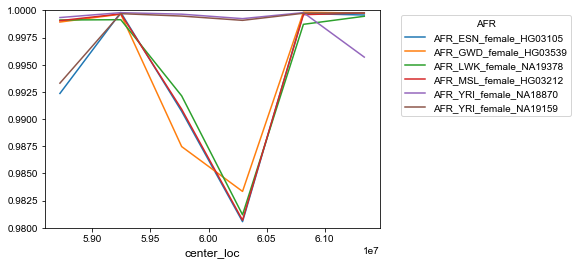

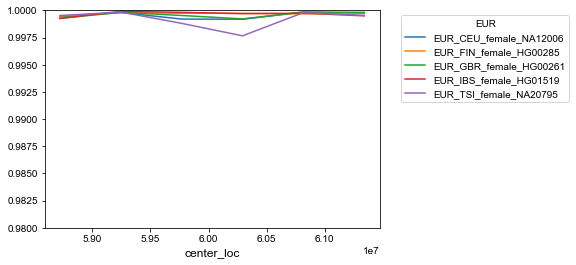

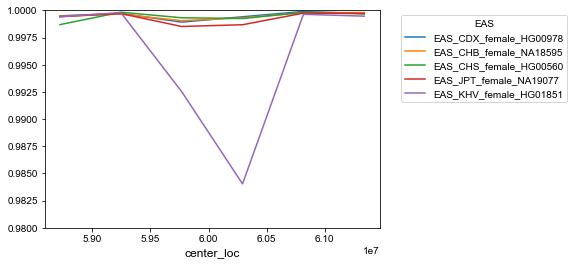

In [247]:
altai_comps[(altai_comps['chr'] == 'chr18') & (altai_comps['center_loc'] >= 59000000-2**20/2) & (altai_comps['center_loc'] <= 61000000+2**20/2)].plot.line(x='center_loc',y=amh_afr,ylim=(0.98,1))
plt.legend(title='AFR', bbox_to_anchor=(1.05, 1), loc='upper left')
altai_comps[(altai_comps['chr'] == 'chr18') & (altai_comps['center_loc'] >= 59000000-2**20/2) & (altai_comps['center_loc'] <= 61000000+2**20/2)].plot.line(x='center_loc',y=amh_eur,ylim=(0.98,1))
plt.legend(title='EUR', bbox_to_anchor=(1.05, 1), loc='upper left')
altai_comps[(altai_comps['chr'] == 'chr18') & (altai_comps['center_loc'] >= 59000000-2**20/2) & (altai_comps['center_loc'] <= 61000000+2**20/2)].plot.line(x='center_loc',y=amh_eas,ylim=(0.98,1))
plt.legend(title='EAS', bbox_to_anchor=(1.05, 1), loc='upper left')

In [52]:
vindija_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
for i in amh:
    pair = pairs[(i,'vindija')][['chr','windowStartPos','spearman']]
    pair.columns = ['chr','windowStartPos',i]
    vindija_comps = vindija_comps.merge(pair, on =['chr','windowStartPos'],how='outer')

vindija_comps[vindija_comps['chr'] == 'chr18'].head()

chr  windowStartPos  AFR_ESN_female_HG03105  AFR_GWD_female_HG03539  \
4306  chr18          524288                0.999587                0.999074   
4307  chr18         1048576                0.996604                0.998795   
4308  chr18         1572864                0.983725                0.980203   
4309  chr18         2097152                0.999570                0.998412   
4310  chr18         2621440                0.998960                0.997838   

      AFR_LWK_female_NA19378  AFR_MSL_female_HG03212  AFR_YRI_female_NA18870  \
4306                0.999272                0.999571                0.999556   
4307                0.997344                0.998131                0.998347   
4308                0.984889                0.985594                0.982898   
4309                0.999564                0.999231                0.985535   
4310                0.999716                0.998650                0.997605   

      AFR_YRI_female_NA19159  EAS_CDX_female_HG00978  EAS_CHB_female_NA18595  \
4306                0.999398                0.999365                0.999605   
4307                0.998208                0.998759                0.998597   
4308                0.986882                0.985731                0.985590   
4309                0.999267                0.999217                0.999573   
4310                0.999036                0.999352                0.999352   

      EAS_CHS_female_HG00560  EAS_JPT_female_NA19077  EAS_KHV_female_HG01851  \
4306                0.999378                0.999387                0.999371   
4307                0.998656                0.999469                0.998628   
4308                0.984289                0.987612                0.988746   
4309                0.998982                0.999318                0.999571   
4310                0.999038                0.999159                0.999513   

      EUR_CEU_female_NA12006  EUR_FIN_female_HG00285  EUR_GBR_female_HG00261  \
4306                0.999240                0.999739                0.999291   
4307                0.999290                0.998422                0.998324   
4308                0.988600                0.983881                0.985552   
4309                0.999282                0.999261                0.998393   
4310                0.999429                0.999478                0.998543   

      EUR_IBS_female_HG01519  EUR_TSI_female_NA20795  
4306                0.999520                0.999560  
4307                0.998162                0.998810  
4308                0.985454                0.985736  
4309                0.999147                0.999390  
4310                0.999497                0.999256

In [53]:
vindija_comps['max_afr'] = vindija_comps.loc[:,amh_afr].max(axis=1)
vindija_comps['max_eurasian'] = vindija_comps.loc[:,amh_eur + amh_eas].max(axis=1)
vindija_comps['mean_eurasian'] = vindija_comps.loc[:,amh_eur + amh_eas].mean(axis=1)

vindija_subset = vindija_comps[(vindija_comps['max_afr'] < 0.995) & (vindija_comps['max_eurasian'] > 0.999) & (vindija_comps['mean_eurasian'] < 0.995)]

In [385]:
vindija_subset

chr  windowStartPos  AFR_ESN_female_HG03105  AFR_GWD_female_HG03539  \
68     chr1        42467328                0.991798                0.993061   
308    chr1       198705152                0.992001                0.992673   
419    chr2        15204352                0.991794                0.987735   
848    chr3        16252928                0.988211                0.989776   
1354   chr4       105906176                0.944996                0.930241   
1378   chr4       118489088                0.990824                0.991792   
1523   chr5         4718592                0.990518                0.990258   
2078   chr6       133169152                0.990104                0.977502   
2229   chr7        45613056                0.990396                0.990117   
3284  chr11       115867648                0.966840                0.970238   
3369  chr12        27787264                0.993007                0.990183   
3521  chr12       112721920                0.994198                0.992323   
3591  chr13        39321600                0.991301                0.990599   
3720  chr13       108003328                0.987636                0.988826   
4191  chr17        10485760                0.986865                0.993773   
4389  chr18        48758784                0.993573                0.993795   
4511  chr19        46661632                0.992949                0.988294   
4597  chr20        39321600                0.981309                0.976730   

      AFR_LWK_female_NA19378  AFR_MSL_female_HG03212  AFR_YRI_female_NA18870  \
68                  0.994203                0.991397                0.992636   
308                 0.992139                0.991237                0.991904   
419                 0.991664                0.990385                0.985444   
848                 0.989983                0.989483                0.988020   
1354                0.929079                0.933192                0.928370   
1378                0.989071                0.991753                0.990795   
1523                0.988659                0.989940                0.990618   
2078                0.979930                0.979669                0.980635   
2229                0.989581                0.990438                0.988990   
3284                0.965347                0.962856                0.970731   
3369                0.993896                0.993037                0.993425   
3521                0.991483                0.993429                0.993248   
3591                0.991373                0.991691                0.991286   
3720                0.990213                0.988443                0.987517   
4191                0.986159                0.987917                0.986417   
4389                0.993222                0.993764                0.991451   
4511                0.994324                0.994183                0.992836   
4597                0.980531                0.980554                0.976143   

      AFR_YRI_female_NA19159  EAS_CDX_female_HG00978  EAS_CHB_female_NA18595  \
68                  0.992553                0.993014                0.998840   
308                 0.992211                0.991426                0.992147   
419                 0.989825                0.984832                0.991868   
848                 0.988334                0.990092                0.991040   
1354                0.930738                0.999361                0.999492   
1378                0.991009                0.991269                0.991269   
1523                0.989398                0.991009                0.989041   
2078                0.979264                0.999436                0.999643   
2229                0.990363                0.989539                0.989163   
3284                0.954175                0.968179                0.968512   
3369                0.993410                0.990196                0.991312   
3521                0.992

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


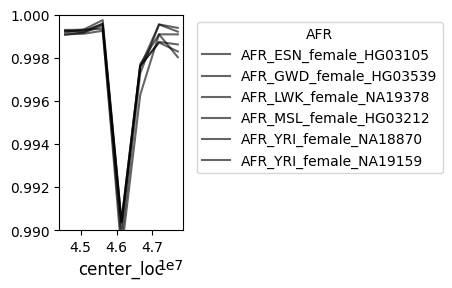

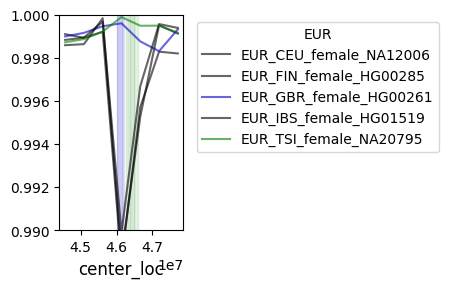

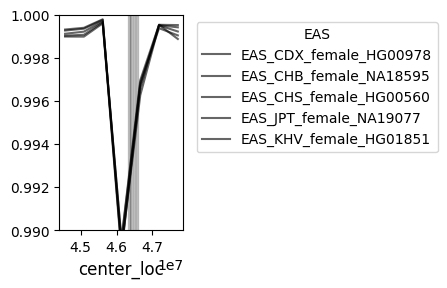

In [54]:
chr = 'chr18'
start = 59000000
end = 61000000

vindija_comps['center_loc'] = vindija_comps['windowStartPos'] + 2**20/2

pops_eur = ['CEU','FIN','GBR','IBS','TSI']
indivs_eur = ['NA12006','HG00285','HG00261','HG01519','NA20795']

pops_eas = ['CDX','CHB','CHS','JPT','KHV']
indivs_eas = ['HG00978','NA18595','HG00560','NA19077','HG01851']
#for start in np.arange(10*2**20,189792256, 10*2**20):
#end = start + 10*2**20

chr = 'chr7'
start = 45613056 - 2**20
end = 45613056 + 2**20*2


#linestyles= ["-.","--o","-.^",':*',"-x",':D']
fig = plt.figure(figsize=(1.6,2.8))
ax = fig.add_subplot(111)
_ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_afr,ylim=(0.99,1),ax=ax, color='k', alpha=0.6)#['r','g','k','b'])
_ = plt.legend(title='AFR', bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.savefig('afr.pdf')

fig = plt.figure(figsize=(1.6,2.8))
ax = fig.add_subplot(111)
_ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_eur,ylim=(0.99,1),ax=ax, color=['k','k','mediumblue','k','g'], alpha=0.6)
_ = plt.legend(title='EUR', bbox_to_anchor=(1.05, 1), loc='upper left')
for idx,indiv in enumerate(zip(pops_eur,indivs_eur)):
    
    out = overlapNeanSegs(indiv[0], indiv[1], chr.strip('chr'), start, end, verbose=False)
    if len(out) > 0:
        color_str = 'C' + str(idx)
        #_ = plt.broken_barh([(i,j) for i,j in zip(out[2],out['len'])], (0,1),alpha=0.1,color=color_str)
        if idx == 2:
            _ = plt.broken_barh([(i,j) for i,j in zip(out[2],out['len'])], (0,1),alpha=0.1,color='mediumblue')
        if idx == 4:
            _ = plt.broken_barh([(i,j) for i,j in zip(out[2],out['len'])], (0,1),alpha=0.1,color='green')



#plt.savefig('eur.pdf')

fig = plt.figure(figsize=(1.6,2.8))
ax = fig.add_subplot(111)
_ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_eas,ylim=(0.99,1),ax=ax, color='k', alpha=0.6)
_ = plt.legend(title='EAS', bbox_to_anchor=(1.05, 1), loc='upper left')

for idx,indiv in enumerate(zip(pops_eas,indivs_eas)):
    out = overlapNeanSegs(indiv[0], indiv[1], chr.strip('chr'), start, end, verbose=False)
    if len(out) > 0:
        color_str = 'C' + str(idx)
        #_ = plt.broken_barh([(i,j) for i,j in zip(out[2],out['len'])], (0,1),alpha=0.1,color=color_str)
        _ = plt.broken_barh([(i,j) for i,j in zip(out[2],out['len'])], (0,1),alpha=0.1,color='k')

    
#plt.savefig('eas.pdf')


41418752 43515904
197656576 199753728
14155776 16252928
15204352 17301504
104857600 106954752
117440512 119537664
3670016 5767168


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


132120576 134217728


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

44564480 46661632


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

114819072 116916224


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

26738688 28835840


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

111673344 113770496


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

38273024 40370176


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


106954752 109051904


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

9437184 11534336


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


47710208 49807360


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

45613056 47710208


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

38273024 40370176


/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


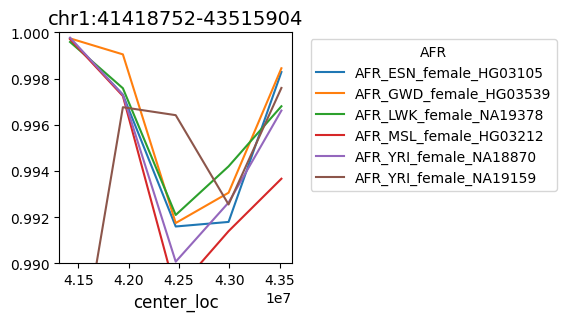

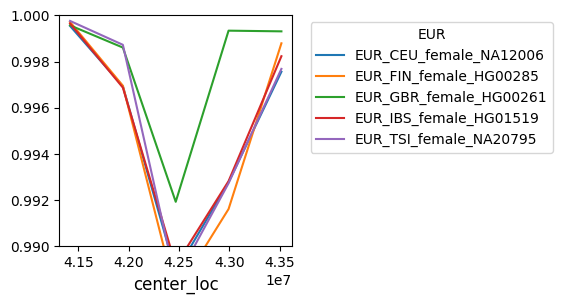

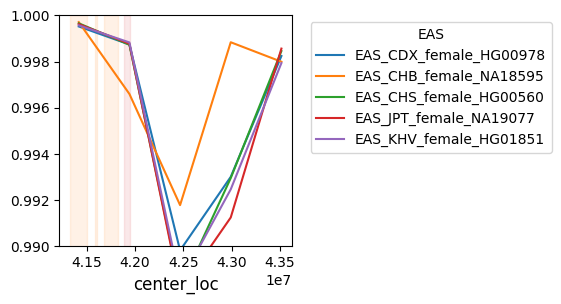

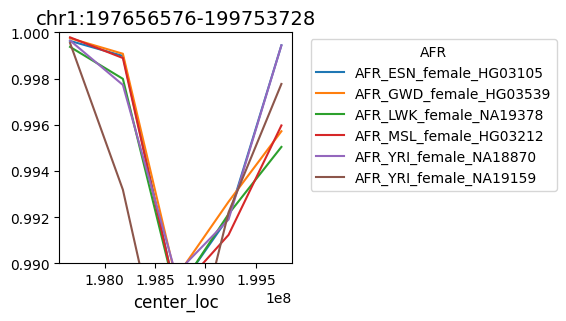

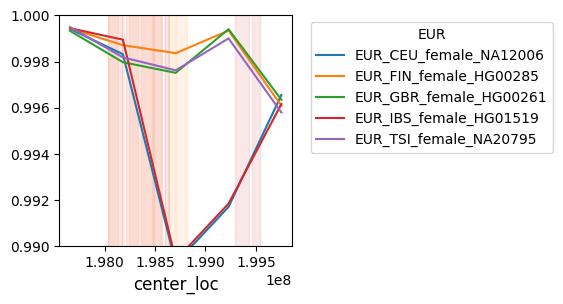

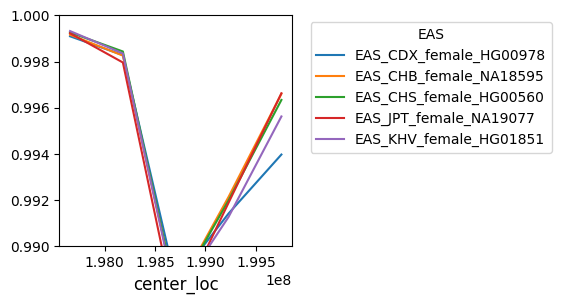

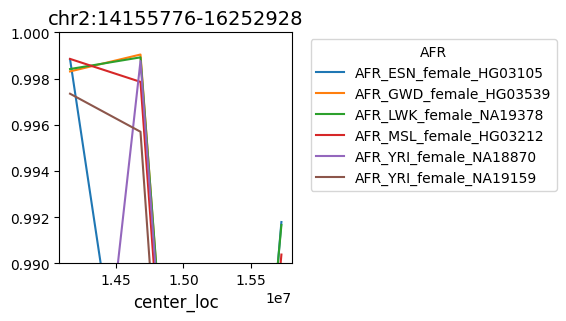

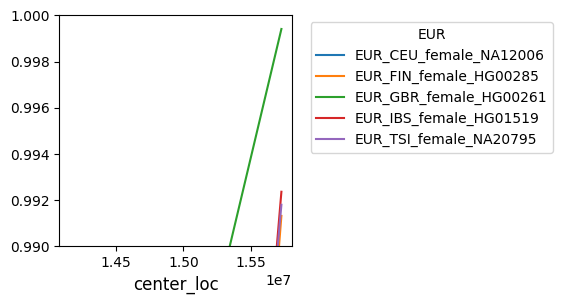

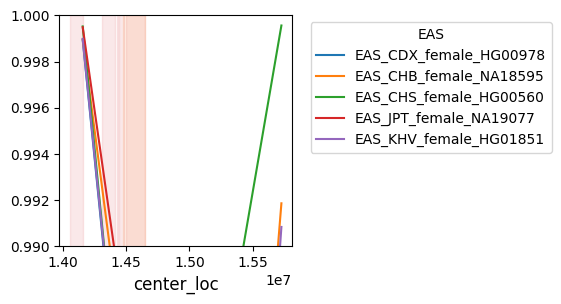

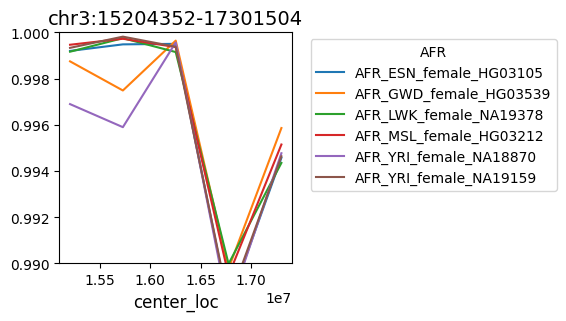

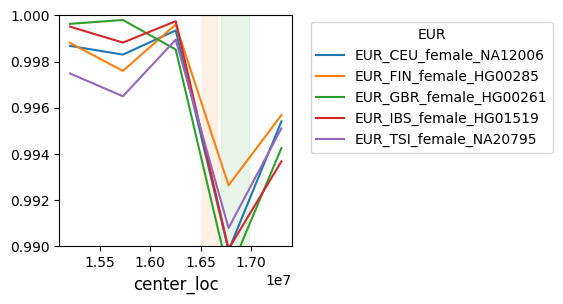

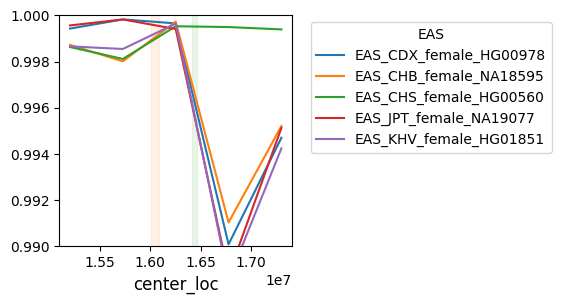

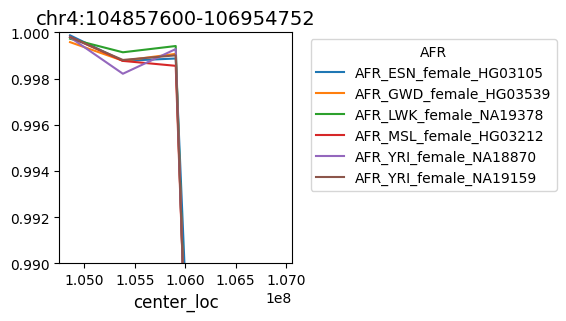

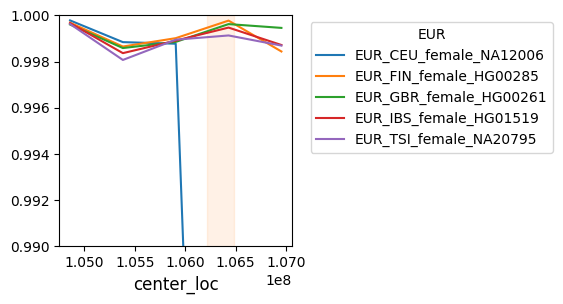

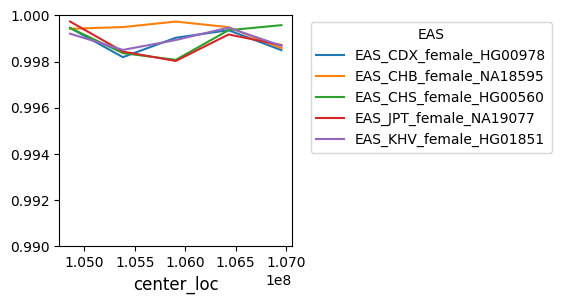

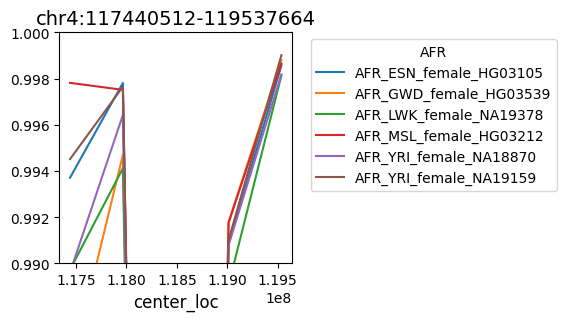

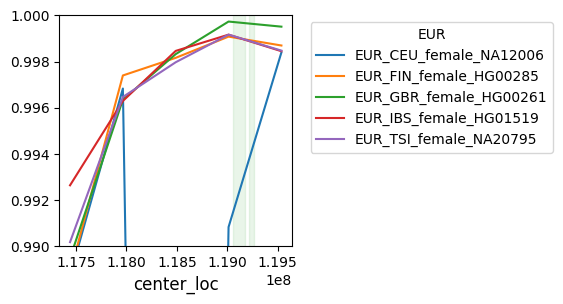

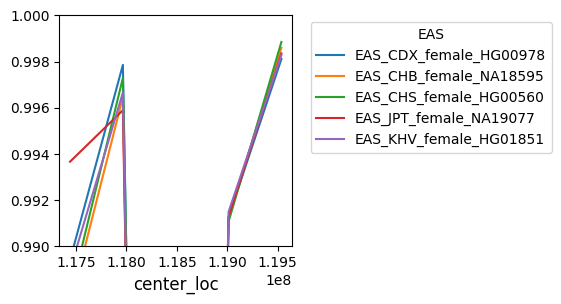

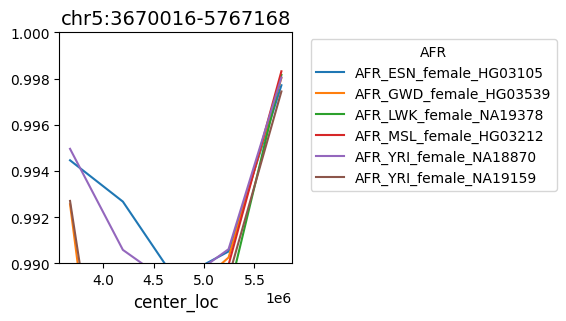

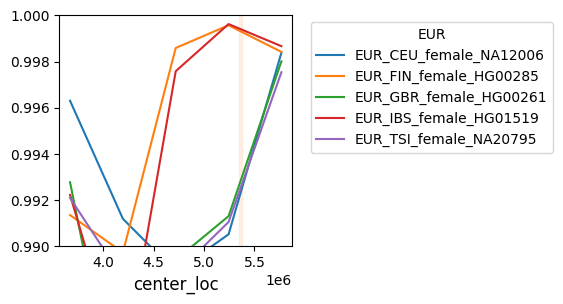

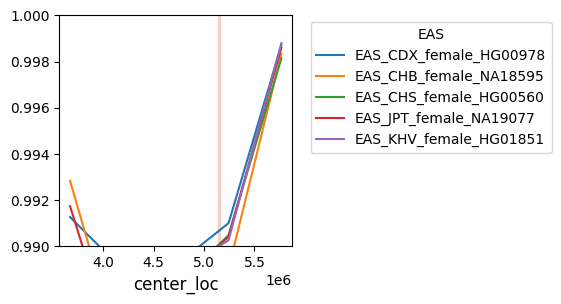

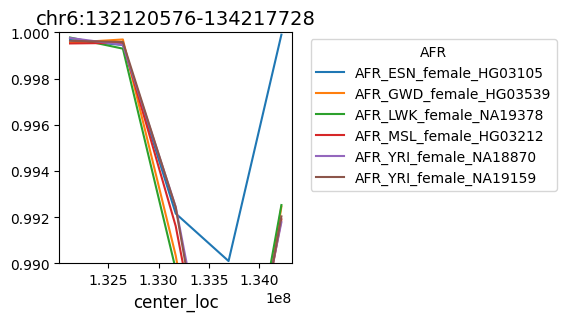

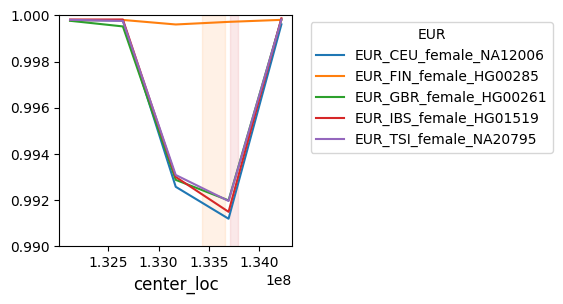

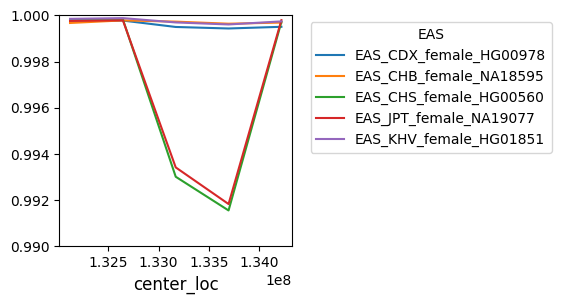

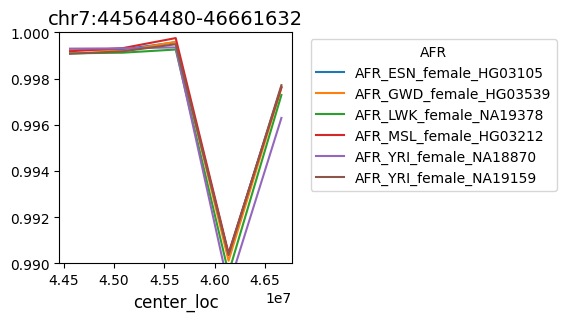

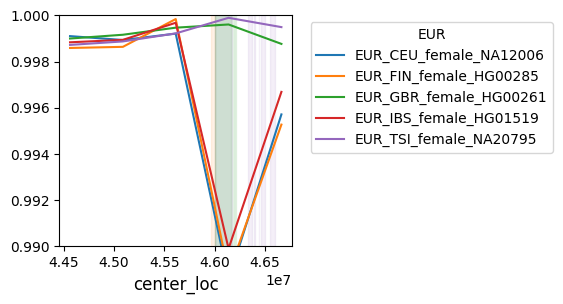

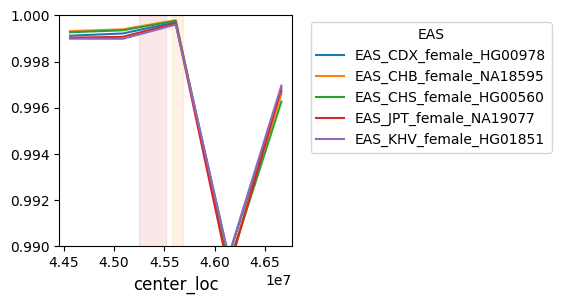

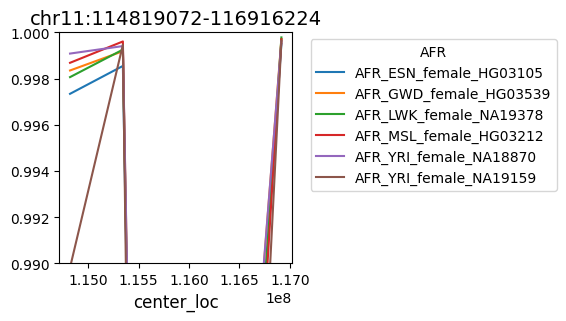

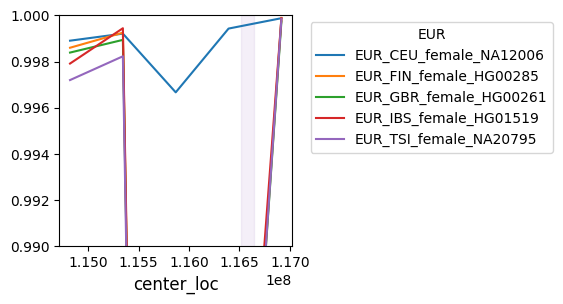

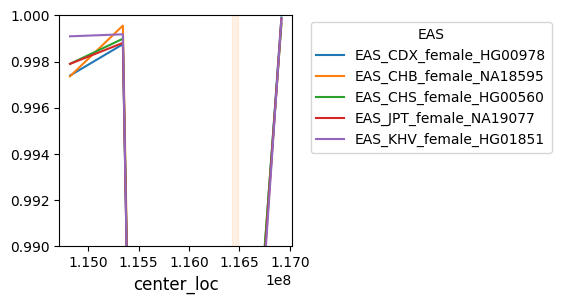

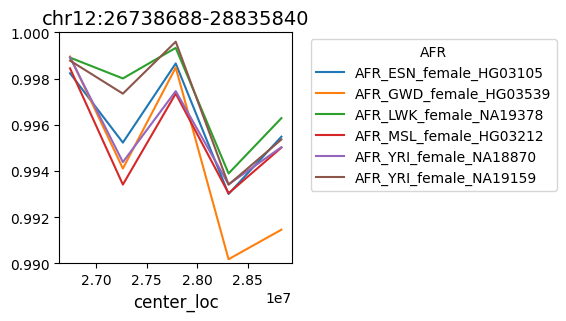

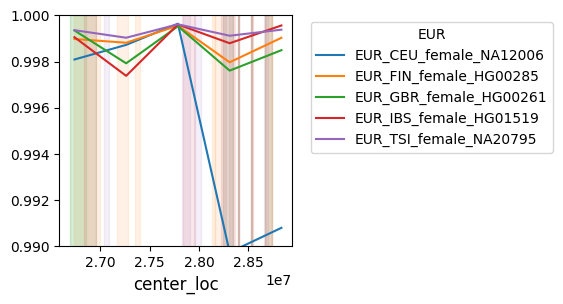

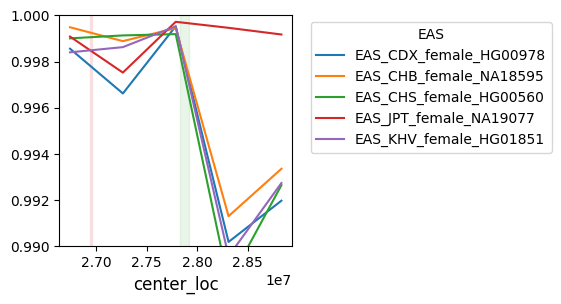

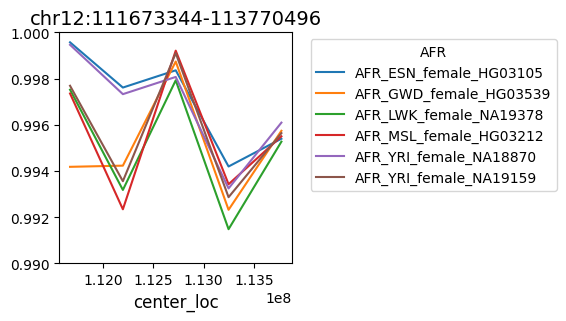

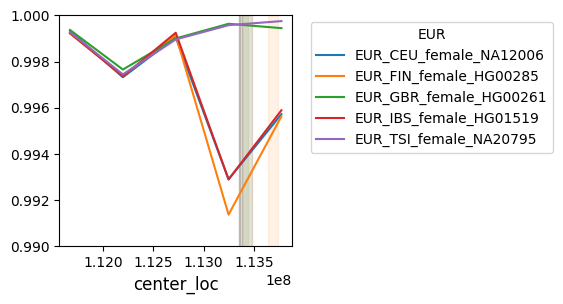

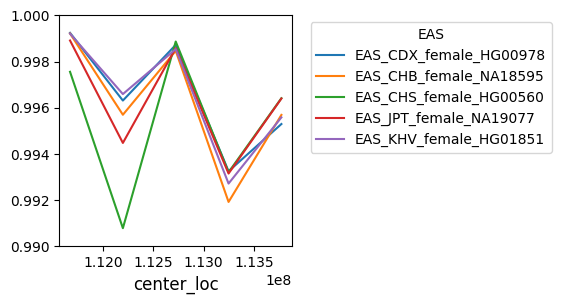

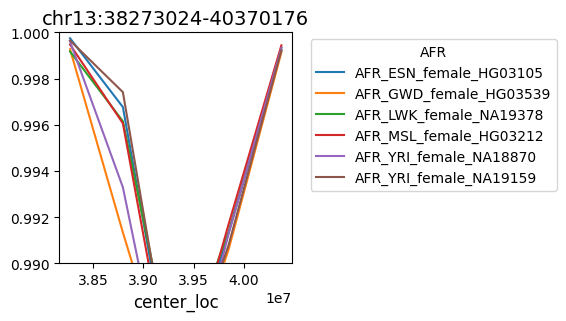

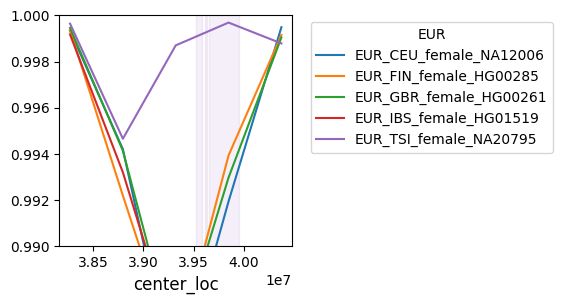

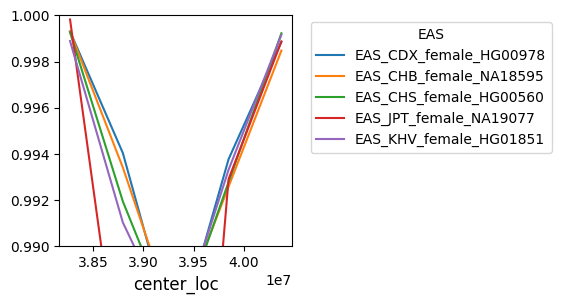

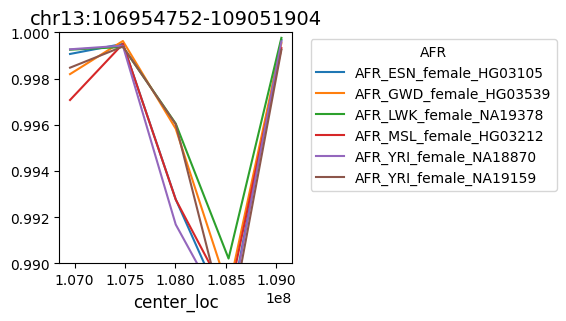

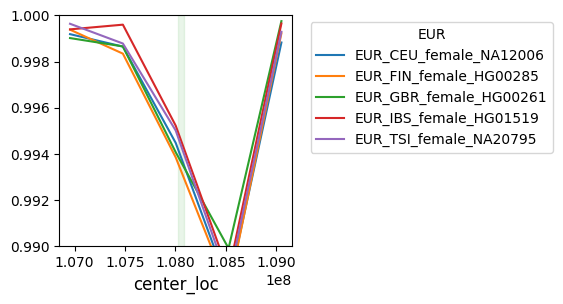

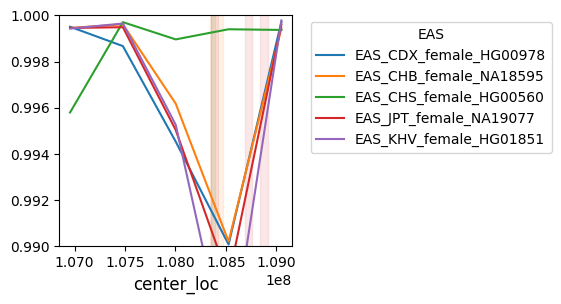

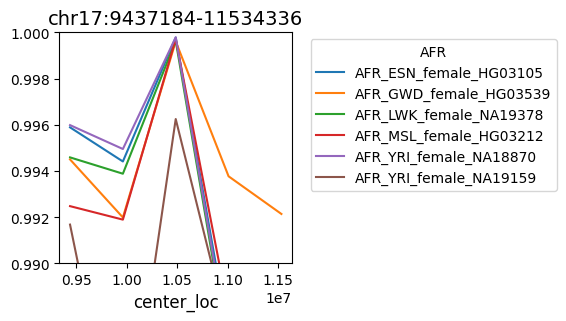

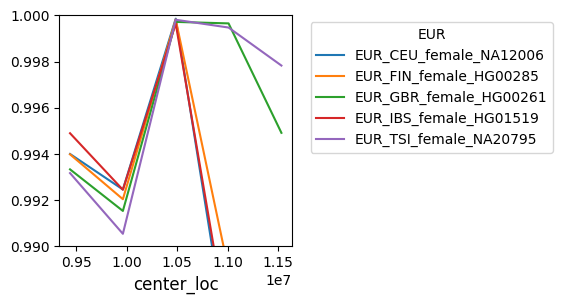

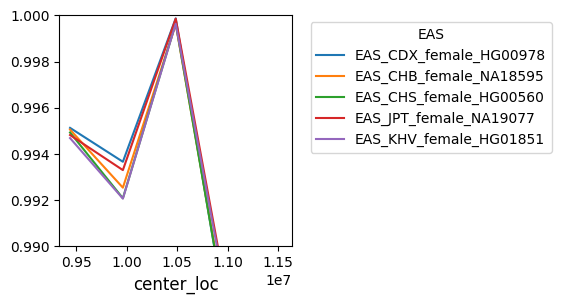

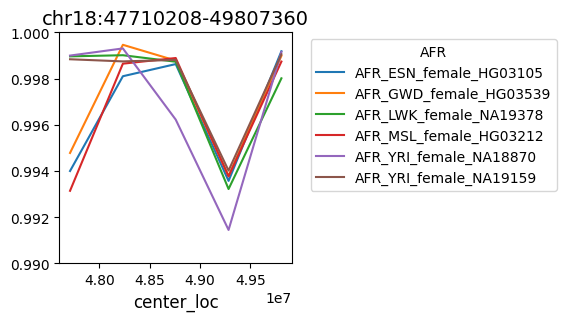

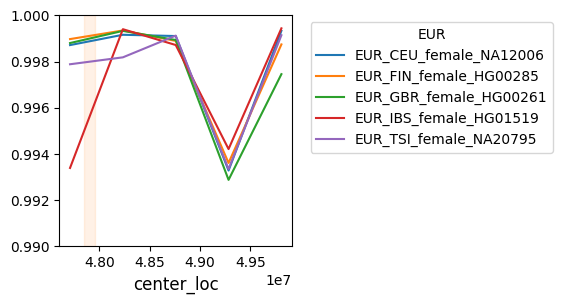

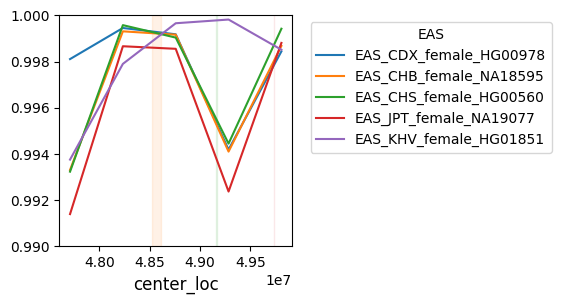

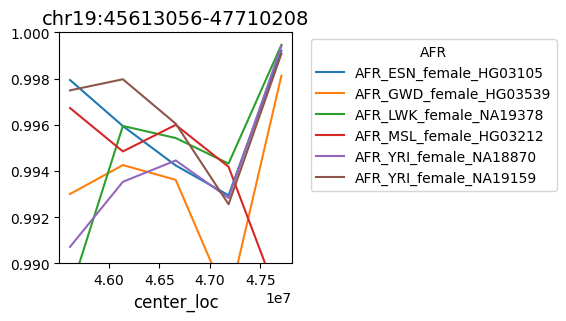

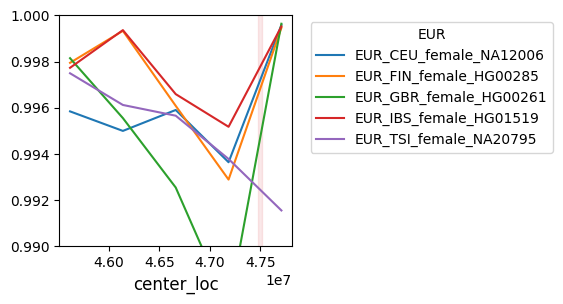

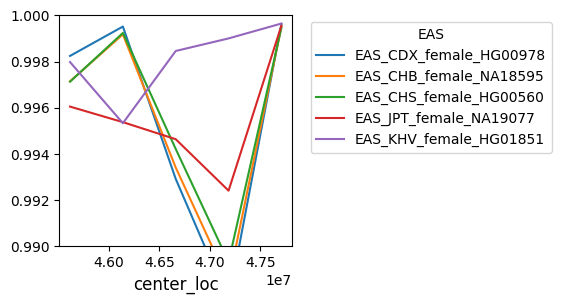

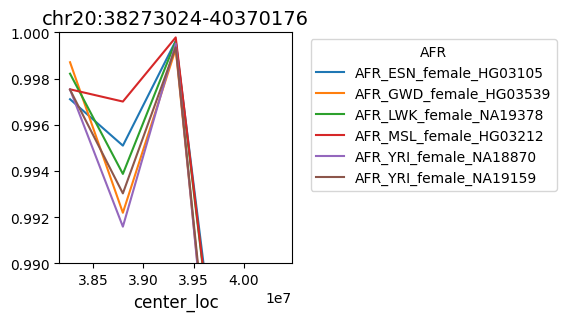

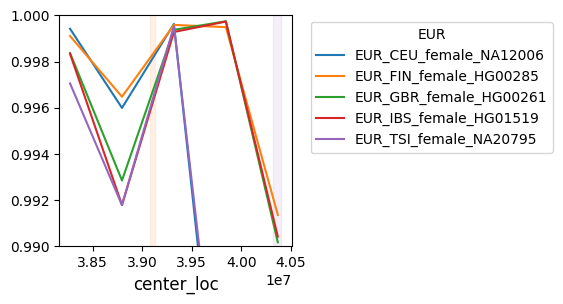

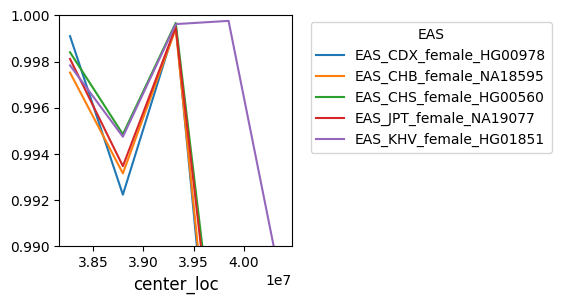

In [57]:
chr = 'chr18'
start = 59000000
end = 61000000

pops_eur = ['CEU','FIN','GBR','IBS','TSI']
indivs_eur = ['NA12006','HG00285','HG00261','HG01519','NA20795']

pops_eas = ['CDX','CHB','CHS','JPT','KHV']
indivs_eas = ['HG00978','NA18595','HG00560','NA19077','HG01851']
#for start in np.arange(10*2**20,189792256, 10*2**20):
#end = start + 10*2**20

for _,row in vindija_subset.iterrows():
    chr = row['chr']
    start = row['windowStartPos'] - 2**20
    end = row['windowStartPos'] + 2**20

    print(start,end)

    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    _ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_afr,ylim=(0.99,1),ax=ax)
    _ = plt.legend(title='AFR', bbox_to_anchor=(1.05, 1), loc='upper left')
    _ = plt.title('%s:%s-%s' % (chr, start, end))

    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    _ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_eur,ylim=(0.99,1),ax=ax)
    _ = plt.legend(title='EUR', bbox_to_anchor=(1.05, 1), loc='upper left')
    for idx,indiv in enumerate(zip(pops_eur,indivs_eur)):
        out = overlapNeanSegs(indiv[0], indiv[1], chr.strip('chr'), start, end, verbose=False)
        if len(out) > 0:
            color_str = 'C' + str(idx)
            _ = plt.broken_barh([(i,j) for i,j in zip(out[2],out['len'])], (0,1),alpha=0.1,color=color_str)

    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    _ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_eas,ylim=(0.99,1),ax=ax)
    _ = plt.legend(title='EAS', bbox_to_anchor=(1.05, 1), loc='upper left')

    for idx,indiv in enumerate(zip(pops_eas,indivs_eas)):
        out = overlapNeanSegs(indiv[0], indiv[1], chr.strip('chr'), start, end, verbose=False)
        if len(out) > 0:
            color_str = 'C' + str(idx)
            _ = plt.broken_barh([(i,j) for i,j in zip(out[2],out['len'])], (0,1),alpha=0.1,color=color_str)

In [318]:
len(out)

6

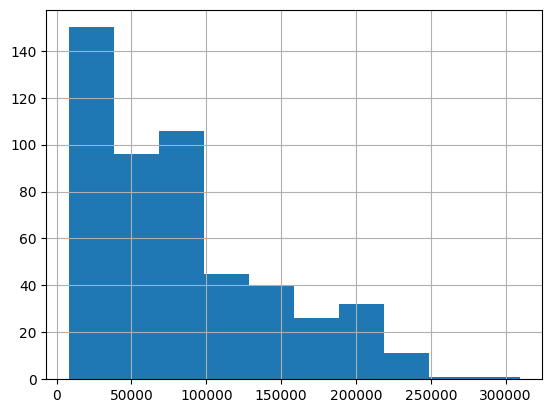

In [43]:
neanHaps = pd.read_csv("/dors/capra_lab/data/ancient_dna/archaic_hominin/sankararaman14/summaries.release/GBR.hapmap/summaries/haplotypes/chr-%s.thresh-90.length-0.00.haplotypes.gz" % '21', skiprows=9,sep='\t',header=None)
(neanHaps[3] - neanHaps[2]).hist()

In [67]:
def overlapNeanSegs(pop, indiv, chr, start, end,verbose=True):
    if verbose:
        print('For individual: %s_%s' % (pop, indiv))
    try:
        indivs = pd.read_csv("/dors/capra_lab/data/ancient_dna/archaic_hominin/sankararaman14/summaries.release/ind/%s.ids" % pop,sep=" ",header=None)
    except FileNotFoundError:
        if verbose:
            print("Error: file doesn't exist in Sankararaman14")
        return([])
    if len(indivs[indivs[0] == indiv]) == 0:
        if verbose:
            print('Error: Individual indices not found.')
        return([])
    elif len(indivs[indivs[0] == indiv]) == 1:
        if verbose:
            print('Note: only haploid info')
    indiv_idx = indivs[indivs[0] == indiv].index
    neanHaps = pd.read_csv("/dors/capra_lab/data/ancient_dna/archaic_hominin/sankararaman14/summaries.release/%s.hapmap/summaries/haplotypes/chr-%s.thresh-90.length-0.00.haplotypes.gz" % (pop,chr), skiprows=9,sep='\t',header=None)
    neanHaps = neanHaps[(((start >= neanHaps[2]) & (start <= neanHaps[3])) |
    ((end >= neanHaps[2]) & (end <= neanHaps[3])) |
    ((start <= neanHaps[2]) & (end >= neanHaps[3])))]
    if verbose:
        print('Number of overlapping Neanderthal haplotypes = %s' % [len(neanHaps[neanHaps[1] == x]) for x in indiv_idx])
    out = pd.DataFrame([])
    for i in indiv_idx:
        if len(neanHaps[neanHaps[1] == i]) > 0:
            out = pd.concat([out,neanHaps[neanHaps[1] == i]])
            if verbose:
                print(neanHaps[neanHaps[1] == i])
    if len(out) > 0:
        out['len'] = out[3]-out[2]
    return(out)

In [68]:
pops_eur = ['FIN','GBR','IBS','TSI']
indivs_eur = ['HG00285','HG00261','HG01519','NA20795']

pops_eas = ['CHB','CHS','JPT']
indivs_eas = ['NA18595','HG00560','NA19077']

vindija_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
for i in amh:
    if any(x in i for x in indivs_eur + indivs_eas):
        pop = pd.DataFrame(pops_eur + pops_eas)[[x in i for x in indivs_eur + indivs_eas]].values.flatten()[0]
        
        pair = pairs[(i,'vindija')][['chr','windowStartPos','spearman']]
        pair.columns = ['chr','windowStartPos',pop]
        vindija_comps = vindija_comps.merge(pair, on =['chr','windowStartPos'],how='outer')

In [31]:
vindija_comps.shape

(4999, 9)

In [36]:
0+2**20/2-2**20/20-1
2**20-2**20/2+2**20/20
(471858 + 576716)/2
2**20/2

(471858 - 576716)/2**20

471858.2

576716.8

524287.0

524288.0

-0.10000038146972656

In [39]:
0+2**20/2-2**20/40-1
2**20-2**20/2+2**20/40
(498073 + 550502)/2
2**20/2

(498073 - 550502)/2**20

498072.6

550502.4

524287.5

524288.0

-0.05000019073486328

In [69]:
#vindija_comps = vindija_comps[vindija_comps['chr'] == 'chr21']
introgression_comps = pd.DataFrame([], index = vindija_comps.index, columns = vindija_comps.columns)
introgression_comps['chr'] = vindija_comps['chr']
introgression_comps['windowStartPos'] = vindija_comps['windowStartPos']
vindija_comps.tail()
for idx,row in introgression_comps.iterrows():
    if idx % 100 == 0:
        print(idx)
    start = row['windowStartPos']
    end = start+2**20
    chrm = row['chr']
    for p,i in zip(pops_eur+pops_eas, indivs_eur+indivs_eas):
        if len(overlapNeanSegs(p,i,chrm.lstrip('chr'),start,end,verbose=False)) > 0: #start,end
            introgression_comps.loc[(introgression_comps['chr'] == chrm) & (introgression_comps['windowStartPos'] == start),p] = True
introgression_comps = introgression_comps.fillna(False)

chr  windowStartPos       CHB       CHS       JPT       FIN       GBR  \
4994  chrX       150994944  0.999506  0.999313  0.999438  0.999611  0.999063   
4995  chrX       152567808  0.999280  0.999645  0.999018  0.999749  0.999743   
4996  chrX       153092096  0.999468  0.999650  0.999237  0.999742  0.999675   
4997  chrX       153616384  0.999890  0.995237  0.995238  0.995393  0.999851   
4998  chrX       154140672  0.999732  0.999637  0.999625  0.999688  0.999864   

           IBS       TSI  
4994  0.999338  0.999305  
4995  0.998748  0.999378  
4996  0.999710  0.999390  
4997  0.995789  0.995381  
4998  0.999678  0.998458

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [272]:
#introgression_comps.to_csv("introgression_comps.csv",index=False)
#10-5
#10-4 2**20/10
#7-4 2**20/5
#5-2 2**20/3
#middle 10% 2-1
#0-1

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1211

837

<Figure size 640x480 with 0 Axes>

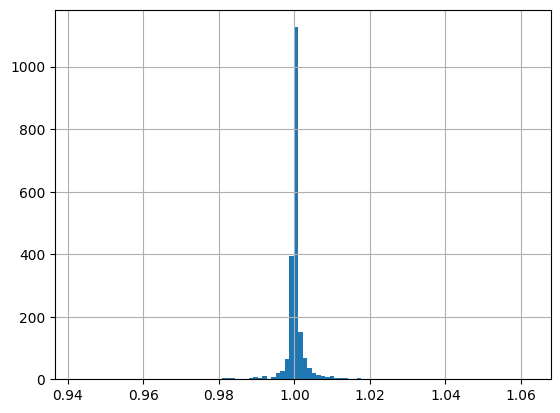

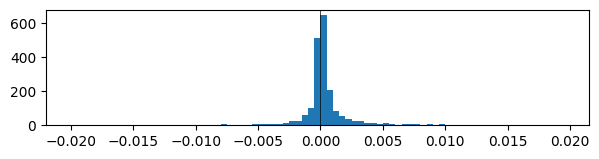

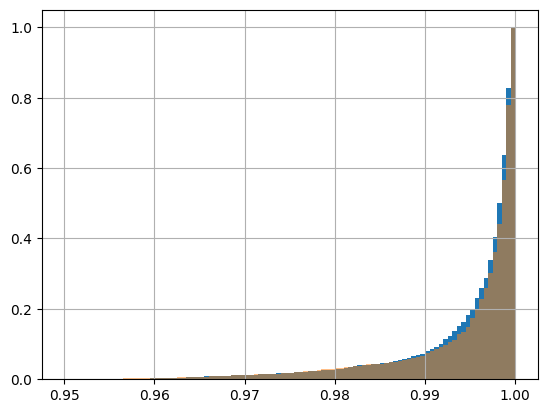

<Figure size 640x480 with 0 Axes>

In [70]:
idx = introgression_comps.loc[:,pops_eur+pops_eas]
notIntrogressedSum = vindija_comps.loc[:,pops_eur+pops_eas][~(idx)].mean(axis=1)
introgressedSum = vindija_comps.loc[:,pops_eur+pops_eas][idx].mean(axis=1)


(introgressedSum[introgressedSum.notnull()]/notIntrogressedSum[introgressedSum.notnull()]).hist(bins=100)
plt.figure()

(introgressedSum[introgressedSum.notnull()] - notIntrogressedSum[introgressedSum.notnull()]).hist(bins=np.arange(-.02,0.02,0.0005),figsize=(7,1.5))
plt.grid(None)
plt.axvline(x=0, color='k',linewidth=0.5);
plt.figure()

sum((introgressedSum[introgressedSum.notnull()]/notIntrogressedSum[introgressedSum.notnull()]) > 1)
sum((introgressedSum[introgressedSum.notnull()]/notIntrogressedSum[introgressedSum.notnull()]) < 1)


notIntrogressedSum[introgressedSum.notnull()].hist(bins=np.arange(0.95,1,0.0005),cumulative=True, density=True)
introgressedSum[introgressedSum.notnull()].hist(bins=np.arange(0.95,1,0.0005),alpha=0.5, cumulative=True, density=True)
                                            
plt.figure()


#vindija_comps.loc[:,pops_eur+pops_eas][~(idx)].head()
#vindija_comps.loc[:,pops_eur+pops_eas][idx].mean(axis=1).notnull()

## Chen calls

In [14]:
pops_eur = ['FIN','GBR','IBS','TSI','CEU']
indivs_eur = ['HG00285','HG00261','HG01519','NA20795','NA12006']


pops_eas = ['CHB','CHS','JPT','CDX','KHV']
indivs_eas = ['NA18595','HG00560','NA19077','HG00978','HG01851']

vindija_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
for i in amh:
    if any(x in i for x in indivs_eur + indivs_eas):
        pop = pd.DataFrame(indivs_eur + indivs_eas)[[x in i for x in indivs_eur + indivs_eas]].values.flatten()[0]
        pair = pairs[(i,'vindija')][['chr','windowStartPos','spearman']]
        pair.columns = ['chr','windowStartPos',pop]
        vindija_comps = vindija_comps.merge(pair, on =['chr','windowStartPos'],how='outer')

In [15]:
chen = pd.read_csv("/dors/capra_lab/data/ancient_dna/archaic_hominin/chen20/chen20_neanderthal_seq_in_1kG_50kb.txt",sep="\t")
chen['chr'] = chen['chr'].apply(lambda x: 'chr' + str(x))
chen = chen[chen['ID'].isin(indivs_eur + indivs_eas)]
chen.head()
chen['ID'].unique()

chr    start      end       LOD    maxLOD    size  pop  anc       ID
31   chr1  2002830  2053073   6.10492   6.10492   50243  CDX  EAS  HG00978
163  chr1  2793062  2879424  29.31580  29.31580   86362  CHS  EAS  HG00560
273  chr1  2911551  2971452  18.62850  18.62850   59901  FIN  EUR  HG00285
356  chr1  3150148  3215874  16.79250  16.79250   65726  KHV  EAS  HG01851
988  chr1  3705572  4004045  19.08750  19.08750  298473  CHS  EAS  HG00560

array(['HG00978', 'HG00560', 'HG00285', 'HG01851', 'HG01519', 'NA18595',
       'NA19077', 'NA20795', 'HG00261', 'NA12006'], dtype=object)

In [98]:
from pybedtools import BedTool 

In [359]:
vindija_comps['end'] = vindija_comps['windowStartPos']+2**20
prop = 1
vindija_comps.head()
vindija_comps['windowStartPos'] = np.round(vindija_comps['windowStartPos'] + 2**20*(1-prop)/2).astype(int)
vindija_comps['end'] = np.round(vindija_comps['end'] - 2**20*(1-prop)/2).astype(int)
windows = BedTool.from_dataframe(vindija_comps[['chr','windowStartPos','end']])
intersect = windows.intersect(BedTool.from_dataframe(chen),wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = ['chr','windowStartPos','end','chrChen','chrStart','chrEnd','LOD','maxLOD','size','pop','anc','ID','overlap']
intersect = intersect.groupby(['chr','windowStartPos','end','ID'])[['overlap']].sum().reset_index()
intersect = intersect[intersect['ID'] != '.']
intersect = intersect.pivot_table(index=['chr','windowStartPos','end'], columns='ID', values='overlap').reset_index()
intersect.index.name = intersect.columns.name = None
intersect = intersect.merge(vindija_comps, on=['chr','windowStartPos','end'], suffixes=('_I', '_3d'))

chr  windowStartPos   HG00978   NA18595   HG00560   NA19077   HG01851  \
0  chr1          524288  0.998288  0.998332  0.998806  0.998803  0.998450   
1  chr1         1048576  0.998294  0.999172  0.997539  0.998561  0.998192   
2  chr1         1572864  0.998980  0.998073  0.997719  0.998727  0.998260   
3  chr1         4194304  0.987016  0.995173  0.991542  0.997103  0.991016   
4  chr1         4718592  0.989885  0.996288  0.988958  0.994452  0.991175   

    NA12006   HG00285   HG00261   HG01519   NA20795      end  
0  0.998405  0.998556  0.997418  0.998239  0.998629  1572864  
1  0.998025  0.997306  0.998724  0.997930  0.998127  2097152  
2  0.998731  0.995972  0.998594  0.997949  0.996996  2621440  
3  0.998322  0.996860  0.998354  0.994886  0.991817  5242880  
4  0.993685  0.994319  0.993160  0.982806  0.992084  5767168

0

/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dors/capra_lab/users/evonne/resources/conda_envs/envs/basenji/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1283-744, 0.63-0.37


<Figure size 640x480 with 0 Axes>

50000

1184-664, 0.64-0.36


<Figure size 640x480 with 0 Axes>

100000

741-359, 0.67-0.33


<Figure size 640x480 with 0 Axes>

200000

354-137, 0.72-0.28


<Figure size 640x480 with 0 Axes>

500000

23-4, 0.85-0.15


<Figure size 640x480 with 0 Axes>

800000

ZeroDivisionError: division by zero

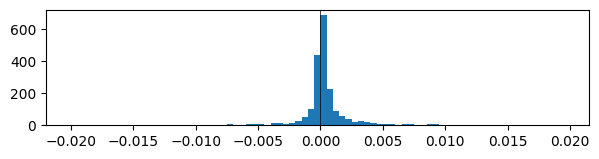

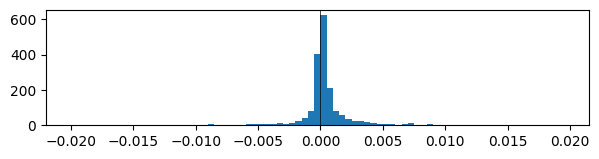

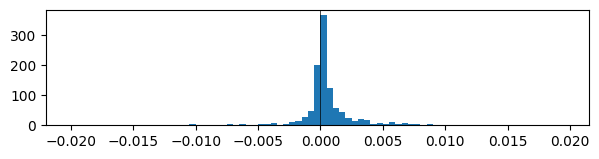

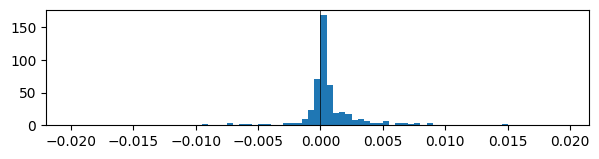

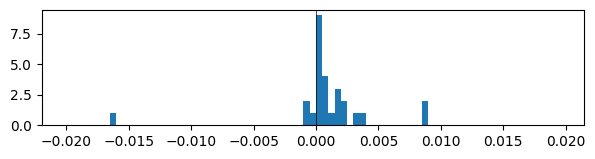

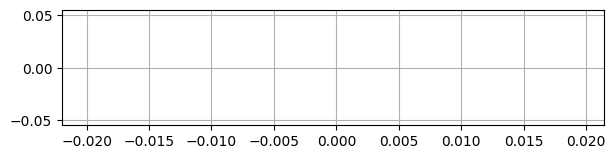

In [360]:
for sizeMin in [0,50000,100000,200000,500000,800000]:
    sizeMin
    intersect[['withI','withoutI']] = pd.DataFrame(intersect.apply(lambda x: averageOfIndivsWithIntrogressionVsWithout(x,sizeMin),axis=1).to_list())
    intersect['withI_diff'] = intersect['withI'] - intersect['withoutI']
    intersect['withI_diff'].hist(bins=np.arange(-.02,0.02,0.0005),figsize=(7,1.5))
    pos = sum(intersect['withI_diff']>0)
    neg = sum(intersect['withI_diff']<0)
    print(f"{pos}-{neg}, {np.round(pos/(pos+neg),2)}-{np.round(neg/(pos+neg),2)}")

    plt.grid(None)
    plt.axvline(x=0, color='k',linewidth=0.5);
    plt.figure()

1377-818, 0.63-0.37


<Figure size 640x480 with 0 Axes>

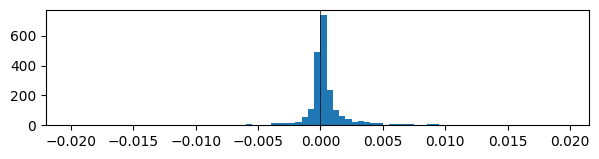

<Figure size 640x480 with 0 Axes>

In [334]:
intersect['withI_diff'].hist(bins=np.arange(-.02,0.02,0.0005),figsize=(7,1.5))
pos = sum(intersect['withI_diff']>0)
neg = sum(intersect['withI_diff']<0)
print(f"{pos}-{neg}, {np.round(pos/(pos+neg),2)}-{np.round(neg/(pos+neg),2)}")

plt.grid(None)
plt.axvline(x=0, color='k',linewidth=0.5);
plt.figure()


In [361]:
def averageOfIndivsWithIntrogressionVsWithout(x,sizeMin=0):
    withIntrogression = []
    noIntrogression = []
    for i in indivs_eur + indivs_eas:

        if x[i + "_I"] > sizeMin:
            withIntrogression.append(x[i + "_3d"])
        else:
            noIntrogression.append(x[i + "_3d"])
            
    return(np.mean(withIntrogression),np.mean(noIntrogression))
            

            

In [369]:
chr = 'chr7'
start = 45613056 - 2**20
end = 45613056 + 2**20*2

In [378]:
for i in amh_eas:
    chen[(chen['ID'] == i.split("_")[3]) & (chen['chr'] == chr) & (chen[''])]

chr      start        end       LOD    maxLOD    size  pop  anc  \
804685  chr7    5203019    5268089   5.60114   5.60114   65070  CDX  EAS   
807090  chr7   10628203   10688820  17.32620  17.32620   60617  CDX  EAS   
808028  chr7   11035109   11162017  13.15460  13.15460  126908  CDX  EAS   
814486  chr7   30602598   30676498   4.61533   4.61533   73900  CDX  EAS   
816949  chr7   36422111   36502702   6.13675   6.13675   80591  CDX  EAS   
820039  chr7   39616335   39765568  42.44060  42.44060  149233  CDX  EAS   
820750  chr7   40797076   40883106  16.06840  16.06840   86030  CDX  EAS   
829162  chr7   51700170   51763626   7.80194   7.80194   63456  CDX  EAS   
829681  chr7   51874593   51936076   7.46238   7.46238   61483  CDX  EAS   
830269  chr7   52343708   52417130   5.78208   5.78208   73422  CDX  EAS   
831830  chr7   56728784   56781283   6.46477   6.46477   52499  CDX  EAS   
832868  chr7   64721108   64799139   8.78742   8.78742   78031  CDX  EAS   
833025  chr7   65697633   65751259   4.43054   4.43054   53626  CDX  EAS   
833128  chr7   65762894   65857732   7.64940   7.64940   94838  CDX  EAS   
833294  chr7   66074262   66125004   7.37636   7.37636   50742  CDX  EAS   
834865  chr7   77634671   77820090  84.71210  84.71210  185419  CDX  EAS   
838436  chr7   83910669   84424417  93.39040  93.39040  513748  CDX  EAS   
840235  chr7   88661814   88734484   6.55302   6.55302   72670  CDX  EAS   
844323  chr7  113958424  114014549   5.16316   5.16316   56125  CDX  EAS   
845575  chr7  123297501  123442349   5.70107   5.70107  144848  CDX  EAS   
846038  chr7  123682804  123841344  22.60710  22.60710  158540  CDX  EAS   
846810  chr7  123885002  123941290   4.05040   4.05040   56288  CDX  EAS   
849625  chr7  134864499  134944188  15.63190  15.63190   79689  CDX  EAS   
850027  chr7  136726868  136816400  29.85200  29.85200   89532  CDX  EAS   
853956  chr7  147067754  147143952   9.03368   9.03368   76198  CDX  EAS   
855005  chr7  157281310  157383372  19.05580  19.05580  102062  CDX  EAS   

             ID  
804685  HG00978  
807090  HG00978  
808028  HG00978  
814486  HG00978  
816949  HG00978  
820039  HG00978  
820750  HG00978  
829162  HG00978  
829681  HG00978  
830269  HG00978  
831830  HG00978  
832868  HG00978  
833025  HG00978  
833128  HG00978  
833294  HG00978  
834865  HG00978  
838436  HG00978  
840235  HG00978  
844323  HG00978  
845575  HG00978  
846038  HG00978  
846810  HG00978  
849625  HG00978  
850027  HG00978  
853956  HG00978  
855005  HG00978

chr      start        end        LOD     maxLOD    size  pop  anc  \
807431  chr7   10628988   10688820   11.27660   11.27660   59832  CHB  EAS   
808072  chr7   11035233   11162017   13.68280   13.68280  126784  CHB  EAS   
808399  chr7   11304814   11362820   17.97760   17.97760   58006  CHB  EAS   
819328  chr7   38401615   38576131   33.70440   33.70440  174516  CHB  EAS   
819929  chr7   39543527   39823753   49.37950   49.37950  280226  CHB  EAS   
820757  chr7   40797076   40883106   18.05470   18.05470   86030  CHB  EAS   
823683  chr7   44133224   44259574   12.89090   12.89090  126350  CHB  EAS   
825891  chr7   45695486   45782051   19.85250   19.85250   86565  CHB  EAS   
827744  chr7   50240105   50364626   46.41190   46.41190  124521  CHB  EAS   
832086  chr7   57409155   57504513    7.94052    7.94052   95358  CHB  EAS   
832481  chr7   63458569   63523859    5.87253    5.87253   65290  CHB  EAS   
834040  chr7   68734319   68907942   69.25070   69.25070  173623  CHB  EAS   
836475  chr7   79634210   79722194   20.08380   20.08380   87984  CHB  EAS   
837268  chr7   81178100   81282629   18.05380   18.05380  104529  CHB  EAS   
837271  chr7   81605462   81713959   67.97170   67.97170  108497  CHB  EAS   
837529  chr7   82216292   82304289   20.27630   20.27630   87997  CHB  EAS   
839359  chr7   85977066   86090739   28.37610   28.37610  113673  CHB  EAS   
840408  chr7   88662774   88719897    9.40846    9.40846   57123  CHB  EAS   
841867  chr7  103407432  103574870  110.39600  110.39600  167438  CHB  EAS   
842212  chr7  104188299  104423982   69.98790   69.98790  235683  CHB  EAS   
842681  chr7  108544319  108607949   32.70200   32.70200   63630  CHB  EAS   
846531  chr7  123761911  123840033   16.72110   16.72110   78122  CHB  EAS   
853783  chr7  147058997  147143952   37.69870   37.69870   84955  CHB  EAS   
854994  chr7  157281310  157383372   11.96340   11.96340  102062  CHB  EAS   

             ID  
807431  NA18595  
808072  NA18595  
808399  NA18595  
819328  NA18595  
819929  NA18595  
820757  NA18595  
823683  NA18595  
825891  NA18595  
827744  NA18595  
832086  NA18595  
832481  NA18595  
834040  NA18595  
836475  NA18595  
837268  NA18595  
837271  NA18595  
837529  NA18595  
839359  NA18595  
840408  NA18595  
841867  NA18595  
842212  NA18595  
842681  NA18595  
846531  NA18595  
853783  NA18595  
854994  NA18595

chr      start        end        LOD     maxLOD    size  pop  anc  \
807953  chr7   10987195   11199180   24.23620   24.23620  211985  CHS  EAS   
811093  chr7   21072090   21170365   19.29940   19.29940   98275  CHS  EAS   
816375  chr7   36260296   36340675   22.91470   22.91470   80379  CHS  EAS   
817465  chr7   36436789   36504181    4.80165    4.80165   67392  CHS  EAS   
831152  chr7   53640346   54084878  140.56600  140.56600  444532  CHS  EAS   
834029  chr7   68731523   68795097   46.10690   46.10690   63574  CHS  EAS   
837390  chr7   82023846   82145784   24.22720   24.22720  121938  CHS  EAS   
837588  chr7   82224101   82304289   13.12410   13.12410   80188  CHS  EAS   
841903  chr7  103466482  103580978   73.67790   73.67790  114496  CHS  EAS   
842179  chr7  104187750  104439570   68.37520   68.37520  251820  CHS  EAS   
846042  chr7  123682804  123841344   23.62690   23.62690  158540  CHS  EAS   
849974  chr7  136658405  136798502   98.83010   98.83010  140097  CHS  EAS   
851729  chr7  146102475  146161975   11.29340   11.29340   59500  CHS  EAS   
853550  chr7  147048087  147104546   11.87020   11.87020   56459  CHS  EAS   

             ID  
807953  HG00560  
811093  HG00560  
816375  HG00560  
817465  HG00560  
831152  HG00560  
834029  HG00560  
837390  HG00560  
837588  HG00560  
841903  HG00560  
842179  HG00560  
846042  HG00560  
849974  HG00560  
851729  HG00560  
853550  HG00560

chr      start        end        LOD     maxLOD    size  pop  anc  \
810441  chr7   19778097   19972534  118.73900  118.73900  194437  JPT  EAS   
811732  chr7   23850240   23910981    4.85366    4.85366   60741  JPT  EAS   
821716  chr7   42238755   42322229   35.70820   35.70820   83474  JPT  EAS   
823718  chr7   44133224   44284783   35.39860   35.39860  151559  JPT  EAS   
827061  chr7   46247037   46315377   44.74760   44.74760   68340  JPT  EAS   
828816  chr7   51196642   51312675   25.56960   25.56960  116033  JPT  EAS   
832705  chr7   64273831   64359193   11.87930   11.87930   85362  JPT  EAS   
832776  chr7   64412173   64464099    9.36612    9.36612   51926  JPT  EAS   
832864  chr7   64721108   64772590    6.40415    6.40415   51482  JPT  EAS   
834038  chr7   68732703   68893089   58.70650   58.70650  160386  JPT  EAS   
836273  chr7   79298005   79849926  243.43500  243.43500  551921  JPT  EAS   
837275  chr7   81605462   81719788   32.75120   32.75120  114326  JPT  EAS   
842240  chr7  104232660  104321313   46.60700   46.60700   88653  JPT  EAS   
842654  chr7  108544319  108607949   29.09390   29.09390   63630  JPT  EAS   
843964  chr7  113865613  113953811    5.23713    5.23713   88198  JPT  EAS   
845515  chr7  123297501  123399684    4.39637    4.39637  102183  JPT  EAS   
850797  chr7  140689584  140808056   16.90080   16.90080  118472  JPT  EAS   
851504  chr7  146101230  146203325   48.44820   48.44820  102095  JPT  EAS   

             ID  
810441  NA19077  
811732  NA19077  
821716  NA19077  
823718  NA19077  
827061  NA19077  
828816  NA19077  
832705  NA19077  
832776  NA19077  
832864  NA19077  
834038  NA19077  
836273  NA19077  
837275  NA19077  
842240  NA19077  
842654  NA19077  
843964  NA19077  
845515  NA19077  
850797  NA19077  
851504  NA19077

chr      start        end        LOD     maxLOD    size  pop  anc  \
803992  chr7    1079673    1144622   11.27960   11.27960   64949  KHV  EAS   
805031  chr7    7455155    7542604   73.00320   73.00320   87449  KHV  EAS   
809971  chr7   19062478   19130831   84.74410   84.74410   68353  KHV  EAS   
810735  chr7   20640095   20696535   35.65990   35.65990   56440  KHV  EAS   
811068  chr7   21069287   21239001   30.03530   30.03530  169714  KHV  EAS   
816945  chr7   36422111   36502702    6.08201    6.08201   80591  KHV  EAS   
819121  chr7   38179347   38576131   46.95650   46.95650  396784  KHV  EAS   
820358  chr7   40065821   40140705    4.50374    4.50374   74884  KHV  EAS   
821396  chr7   41852307   41924215   30.14480   30.14480   71908  KHV  EAS   
825869  chr7   45695465   45843185   17.14340   17.14340  147720  KHV  EAS   
829364  chr7   51705480   51765372    7.36098    7.36098   59892  KHV  EAS   
831267  chr7   53983154   54078459   22.17120   22.17120   95305  KHV  EAS   
833368  chr7   67132976   67236826   14.65610   14.65610  103850  KHV  EAS   
833707  chr7   67380909   67462637    6.71673    6.71673   81728  KHV  EAS   
834368  chr7   71428304   71485411   20.20150   20.20150   57107  KHV  EAS   
836529  chr7   79634210   79774364   32.30900   32.30900  140154  KHV  EAS   
837086  chr7   80763135   80838113   19.78250   19.78250   74978  KHV  EAS   
837255  chr7   81084698   81282629  107.96500  107.96500  197931  KHV  EAS   
838643  chr7   84296621   84424417   90.13060   90.13060  127796  KHV  EAS   
841960  chr7  103856757  104154817   69.01600   69.01600  298060  KHV  EAS   
845541  chr7  123297501  123432329    4.14235    4.14235  134828  KHV  EAS   
849541  chr7  134831182  134965851   25.53320   25.53320  134669  KHV  EAS   
850347  chr7  140129531  140184168   15.86470   15.86470   54637  KHV  EAS   

             ID  
803992  HG01851  
805031  HG01851  
809971  HG01851  
810735  HG01851  
811068  HG01851  
816945  HG01851  
819121  HG01851  
820358  HG01851  
821396  HG01851  
825869  HG01851  
829364  HG01851  
831267  HG01851  
833368  HG01851  
833707  HG01851  
834368  HG01851  
836529  HG01851  
837086  HG01851  
837255  HG01851  
838643  HG01851  
841960  HG01851  
845541  HG01851  
849541  HG01851  
850347  HG01851

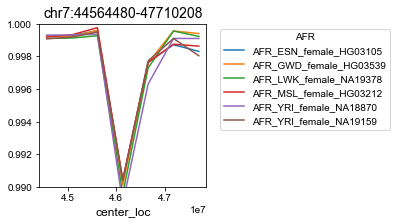

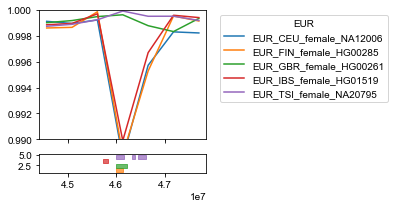

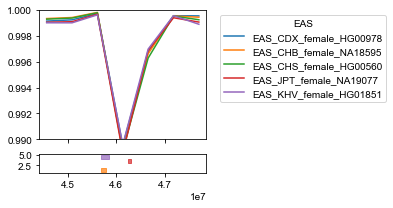

In [17]:
chr = 'chr7'
start = 45613056 - 2**20
end = 45613056 + 2**20*2


vindija_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
for i in amh:
    pair = pairs[(i,'vindija')][['chr','windowStartPos','spearman']]
    pair.columns = ['chr','windowStartPos',i]
    vindija_comps = vindija_comps.merge(pair, on =['chr','windowStartPos'],how='outer')

vindija_comps['center_loc'] = vindija_comps['windowStartPos'] + 2**20/2
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
_ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_afr,ylim=(0.99,1),ax=ax)
_ = plt.legend(title='AFR', bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title('%s:%s-%s' % (chr, start, end))

fig, (ax1, ax2) = plt.subplots(2,sharex='col',gridspec_kw={'height_ratios': [7, 1]},figsize=(3,3))
_ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_eur,ylim=(0.99,1),ax=ax1)
_ = ax1.legend(title='EUR', bbox_to_anchor=(1.05, 1), loc='upper left')


for idx,indiv in enumerate(amh_eur):
    subset = chen[(chen['ID'] == indiv.split("_")[3]) & (chen['chr'] == chr)]
    subset = subset[(((start >= subset['start']) & (start <= subset['end'])) |
    ((end >= subset['start']) & (end <= subset['end'])) |
    ((start <= subset['start']) & (end >= subset['end'])))]
    if len(subset) > 0:
        color_str = 'C' + str(idx)
        _ = ax2.broken_barh([(i,j) for i,j in zip(subset['start'],subset['size'])], (idx,0.9),alpha=0.7,color=color_str)
fig, (ax1, ax2) = plt.subplots(2,sharex='col',gridspec_kw={'height_ratios': [7, 1]},figsize=(3,3))
_ = vindija_comps[(vindija_comps['chr'] == chr) & (vindija_comps['center_loc'] >= start) & (vindija_comps['center_loc'] <= end)].plot.line(x='center_loc',y=amh_eas,ylim=(0.99,1),ax=ax1)
_ = ax1.legend(title='EAS', bbox_to_anchor=(1.05, 1), loc='upper left')


for idx,indiv in enumerate(amh_eas):
    subset = chen[(chen['ID'] == indiv.split("_")[3]) & (chen['chr'] == chr)]
    subset = subset[(((start >= subset['start']) & (start <= subset['end'])) |
    ((end >= subset['start']) & (end <= subset['end'])) |
    ((start <= subset['start']) & (end >= subset['end'])))]
    if len(subset) > 0:
        color_str = 'C' + str(idx)
        _ = ax2.broken_barh([(i,j) for i,j in zip(subset['start'],subset['size'])], (idx,0.9),alpha=0.7,color=color_str)

## Modern AFR vs Archaic 3D divergence

In [5]:
afr_20 = ['AFR_ESN_female_HG03105',
'AFR_GWD_female_HG03539',
'AFR_LWK_female_NA19378',
'AFR_MSL_female_HG03212',
'AFR_ESN_female_HG03499',
'AFR_ESN_female_HG03511',
'AFR_ESN_female_HG03514',
'AFR_ESN_male_HG02923',
'AFR_GWD_female_HG03025',
'AFR_GWD_female_HG03028',
'AFR_GWD_male_HG03039',
'AFR_GWD_male_HG03045',
'AFR_LWK_female_NA19017',
'AFR_LWK_female_NA19434',
'AFR_LWK_female_NA19445',
'AFR_LWK_male_NA19331',
'AFR_MSL_male_HG03057',
'AFR_MSL_male_HG03060',
'AFR_MSL_male_HG03074',
'AFR_MSL_male_HG03077']

In [6]:
coverage = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_AFR_GWD_female_HG03539.txt.gz",sep="\t",header=None)
coverage.columns= ['chr','windowStartPos','coverage','masked_coverage']
regionsToKeep = coverage[coverage['coverage'] == 1][['chr','windowStartPos','masked_coverage']]
len(regionsToKeep) # only keep regions with full coverage in 1kg!!

4999

In [7]:
# This takes a few minutes

pairs_20afr = pd.DataFrame([])
afr_afrComps = []

for i1 in afr_20:
    print(i1)
    for i2 in afr_20:
        try:
            pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/pairwiseComparisons_20AFR_spearmanOnly/3dcomp_%s_vs_%s.txt.gz" % (i1,i2),sep="\t")
            pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos'])[['chr','windowStartPos','masked_coverage','spearman']] # only keep windows with full coverage in 1kg
            pair.columns = ['chr','windowStartPos','masked_coverage',i1 + '_VS_' + i2]
            if pairs_20afr.empty:
                 pairs_20afr = pair
            else:
                pairs_20afr = pairs_20afr.merge(pair, on=['chr','windowStartPos','masked_coverage'])
            afr_afrComps.append(i1 + '_VS_' + i2)
        except FileNotFoundError:
            pass
        
afr_arcComps = []

i1 = 'vindija'
for i2 in afr_20:
    pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/pairwiseComparisons_20AFR_spearmanOnly/3dcomp_%s_vs_%s.txt.gz" % (i1,i2),sep="\t")
    pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos'])[['chr','windowStartPos','masked_coverage','spearman']] # only keep windows with full coverage in 1kg
    pair.columns = ['chr','windowStartPos','masked_coverage',i1 + '_VS_' + i2]
    pairs_20afr = pairs_20afr.merge(pair, on=['chr','windowStartPos','masked_coverage'])
    afr_arcComps.append(i1 + '_VS_' + i2)


    

AFR_ESN_female_HG03105
AFR_GWD_female_HG03539
AFR_LWK_female_NA19378
AFR_MSL_female_HG03212
AFR_ESN_female_HG03499
AFR_ESN_female_HG03511
AFR_ESN_female_HG03514
AFR_ESN_male_HG02923
AFR_GWD_female_HG03025
AFR_GWD_female_HG03028
AFR_GWD_male_HG03039
AFR_GWD_male_HG03045
AFR_LWK_female_NA19017
AFR_LWK_female_NA19434
AFR_LWK_female_NA19445
AFR_LWK_male_NA19331
AFR_MSL_male_HG03057
AFR_MSL_male_HG03060
AFR_MSL_male_HG03074
AFR_MSL_male_HG03077


In [48]:
pairs_20afr['afr_arcComps_mean'] = pairs_20afr[afr_arcComps].mean(axis=1)
pairs_20afr['afr_afrComps_mean'] = pairs_20afr[afr_afrComps].mean(axis=1)
pairs_20afr['afr_arcComps_sd'] = pairs_20afr[afr_arcComps].std(axis=1)
pairs_20afr['afr_afrComps_sd'] = pairs_20afr[afr_afrComps].std(axis=1)
pairs_20afr['comps_diff_mean'] =  pairs_20afr['afr_afrComps_mean'] - pairs_20afr['afr_arcComps_mean']
pairs_20afr['mwuP'] = pairs_20afr.apply(lambda x: stats.mannwhitneyu(x[afr_afrComps],x[afr_arcComps], alternative='greater')[1],axis=1)

In [23]:
np.sort(-np.log10(np.arange(0,1,1/len(pairs_20afr))))

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([8.68849622e-05, 1.73787310e-04, 2.60707050e-04, ...,
       3.39785314e+00, 3.69888314e+00,            inf])

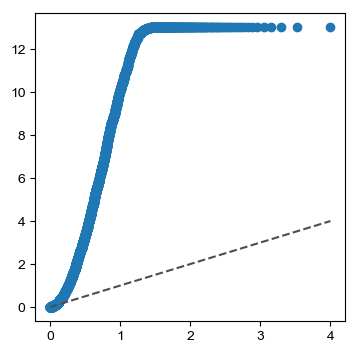

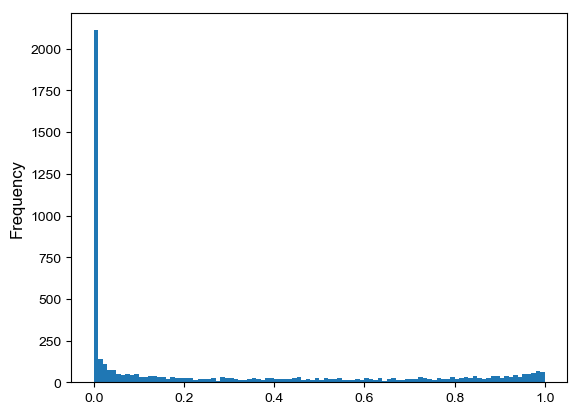

In [46]:
y = pairs_20afr['mwuP'].sort_values()
x = np.arange(0+1/(len(x)*2),1,1/(len(x)))
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x=-np.log10(x),y=-np.log10(y))
ax.plot([0, 4], [0, 4], ls="--", c=".3")
plt.show()
pairs_20afr['mwuP'].plot.hist(bins=100)

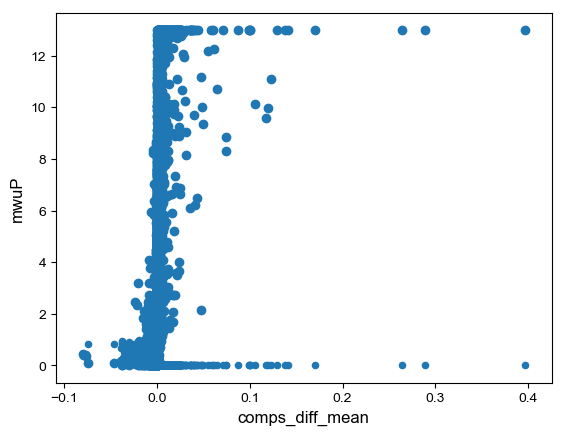

In [53]:
#pairs_20afr[pairs_20afr['mwuP'] < 0.05/4999]
pairs_20afr.plot.scatter(x='comps_diff_mean',y='mwuP')
plt.scatter(x=pairs_20afr['comps_diff_mean'],y=-np.log10(pairs_20afr['mwuP']))

2744

2255

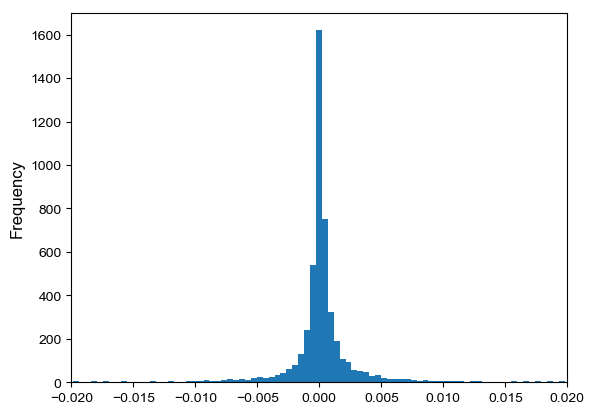

In [84]:
fig, ax = plt.subplots();
sum(pairs_20afr['comps_diff_mean'] > 0)
sum(pairs_20afr['comps_diff_mean'] < 0)

pairs_20afr['comps_diff_mean'].plot.hist(bins=1000,ax=ax,xlim=(-.02,.02))

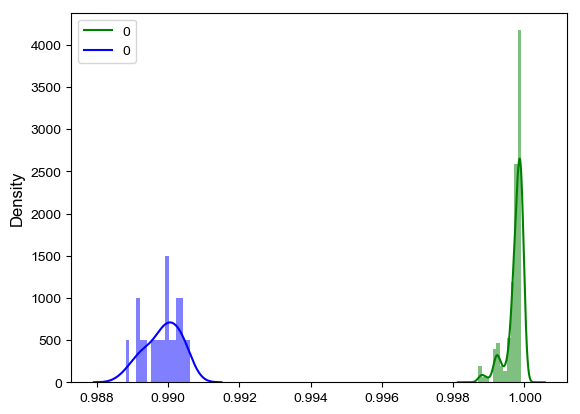

In [81]:
afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr7') & (pairs_20afr['windowStartPos'] == 45613056),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr7') & (pairs_20afr['windowStartPos'] == 45613056),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.0001
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.0001), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.0001), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

pairs_20afr.loc[(pairs_20afr['chr'] =='chr7') & (pairs_20afr['windowStartPos'] == 45613056),'comps_diff_mean']
plt.show();


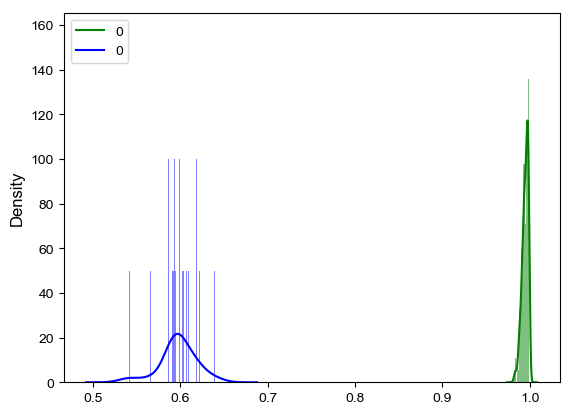

In [112]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] > .2)]


afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr5') & (pairs_20afr['windowStartPos'] == 23592960),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr5') & (pairs_20afr['windowStartPos'] == 23592960),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.001
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.001), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.001), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

plt.show();


chr  windowStartPos  masked_coverage  \
1086  chr3       148373504         0.711182   

      AFR_GWD_female_HG03539_VS_AFR_ESN_female_HG03105  \
1086                                          0.999485   

      AFR_LWK_female_NA19378_VS_AFR_ESN_female_HG03105  \
1086                                          0.999466   

      AFR_LWK_female_NA19378_VS_AFR_GWD_female_HG03539  \
1086                                          0.999451   

      AFR_MSL_female_HG03212_VS_AFR_ESN_female_HG03105  \
1086                                          0.999568   

      AFR_MSL_female_HG03212_VS_AFR_GWD_female_HG03539  \
1086                                          0.999563   

      AFR_MSL_female_HG03212_VS_AFR_LWK_female_NA19378  \
1086                                          0.999688   

      AFR_ESN_female_HG03499_VS_AFR_ESN_female_HG03105       ...         \
1086                                          0.999027       ...          

      vindija_VS_AFR_LWK_female_NA19434  vindija_VS_AFR_LWK_female_NA19445  \
1086                           0.999668                           0.999712   

      vindija_VS_AFR_LWK_male_NA19331  vindija_VS_AFR_MSL_male_HG03057  \
1086                         0.999326                         0.999426   

      vindija_VS_AFR_MSL_male_HG03060  vindija_VS_AFR_MSL_male_HG03074  \
1086                         0.999343                         0.999426   

      vindija_VS_AFR_MSL_male_HG03077  afr_arcComps_mean  afr_afrComps_mean  \
1086                         0.998754           0.999327           0.999383   

      comps_diff_mean  
1086         0.000056  

[1 rows x 216 columns]

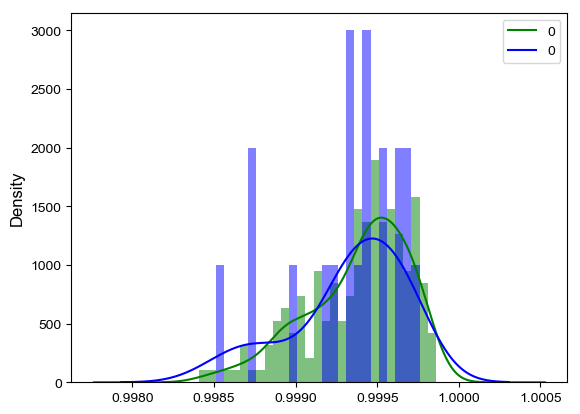

In [121]:
pairs_20afr.sort_values(['comps_diff_mean']).head(round(len(pairs_20afr)/2)).tail(1)


afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr3') & (pairs_20afr['windowStartPos'] == 148373504),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr3') & (pairs_20afr['windowStartPos'] == 148373504),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.00005
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.00005), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.00005), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

plt.show();


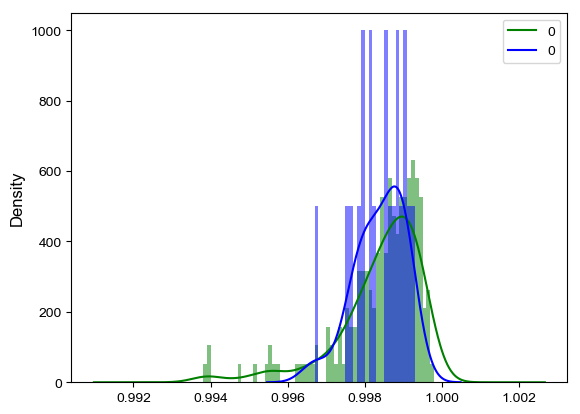

In [89]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] > -.000001) & (pairs_20afr['comps_diff_mean'] < .000001)]

afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr2') & (pairs_20afr['windowStartPos'] == 36175872),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr2') & (pairs_20afr['windowStartPos'] == 36175872),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.0001
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.0001), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.0001), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

plt.show();


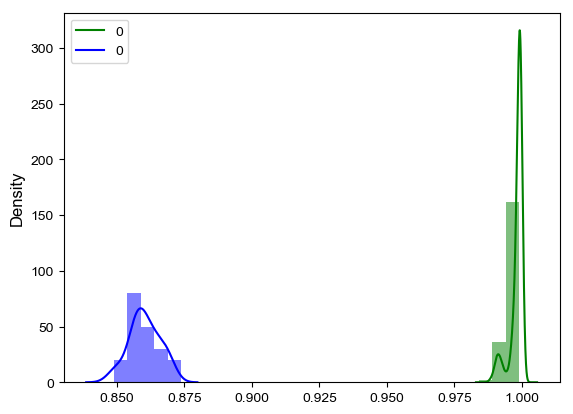

In [133]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] > .05) &  (pairs_20afr['afr_arcComps_sd'] < .01) &(pairs_20afr['afr_afrComps_sd'] < .01)]


afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr3') & (pairs_20afr['windowStartPos'] == 81264640),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr3') & (pairs_20afr['windowStartPos'] == 81264640),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.005
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.005), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.005), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

plt.show();



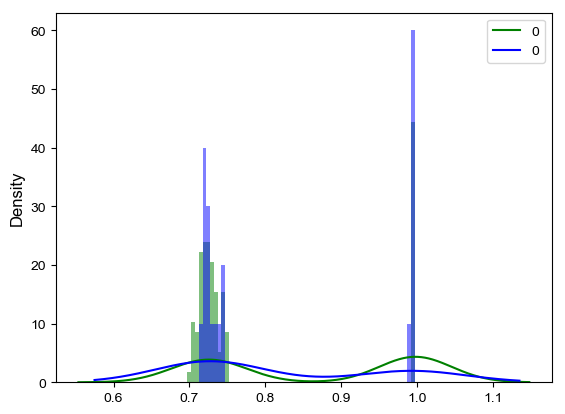

In [135]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] > .01) &  (pairs_20afr['afr_arcComps_sd'] > .1) &(pairs_20afr['afr_afrComps_sd'] > .1)]

afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr8') & (pairs_20afr['windowStartPos'] == 119537664),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr8') & (pairs_20afr['windowStartPos'] == 119537664),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.005
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.005), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.005), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

plt.show();

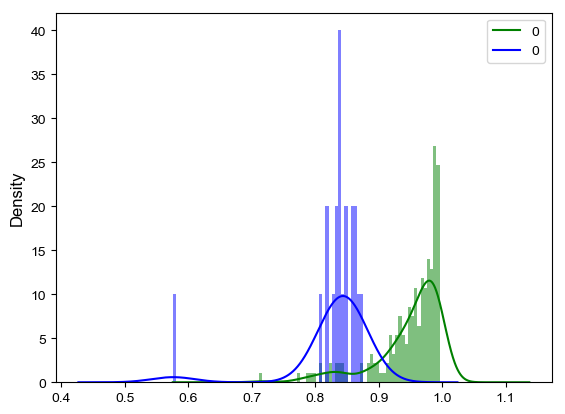

In [127]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] > .05) &  (pairs_20afr['afr_arcComps_sd'] > .05) &(pairs_20afr['afr_afrComps_sd'] > .05)]

afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr7') & (pairs_20afr['windowStartPos'] == 3145728),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr7') & (pairs_20afr['windowStartPos'] == 3145728),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.005
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.005), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.005), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

plt.show();



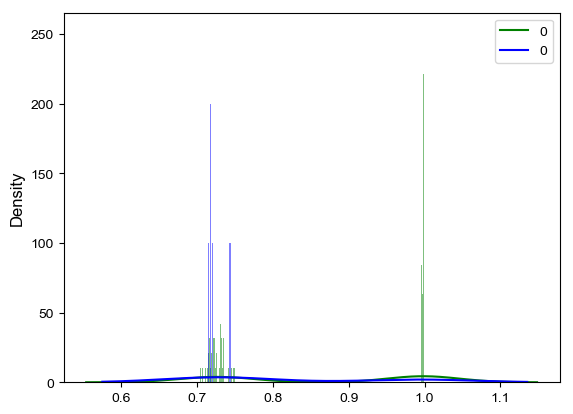

In [140]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] > .01) &  (pairs_20afr['afr_arcComps_sd'] > .05) &(pairs_20afr['afr_afrComps_sd'] > .05)]

afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr8') & (pairs_20afr['windowStartPos'] == 119537664),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr8') & (pairs_20afr['windowStartPos'] == 119537664),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.0005
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.0005), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.0005), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

plt.show();


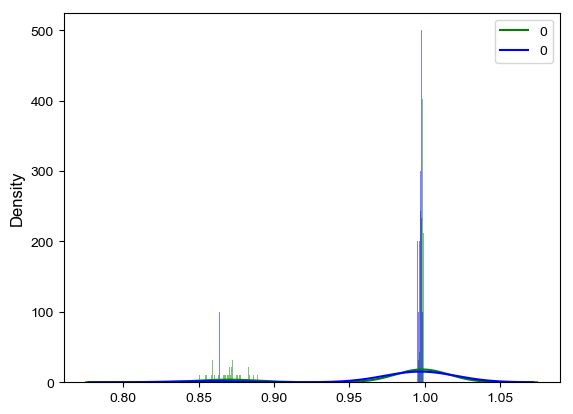

In [104]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] < -.05)]

afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr2') & (pairs_20afr['windowStartPos'] == 126353408),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chr2') & (pairs_20afr['windowStartPos'] == 126353408),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.0005
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.0005), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.0005), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

pairs_20afr.loc[(pairs_20afr['chr'] =='chr2') & (pairs_20afr['windowStartPos'] == 126353408),'comps_diff_mean']
plt.show();


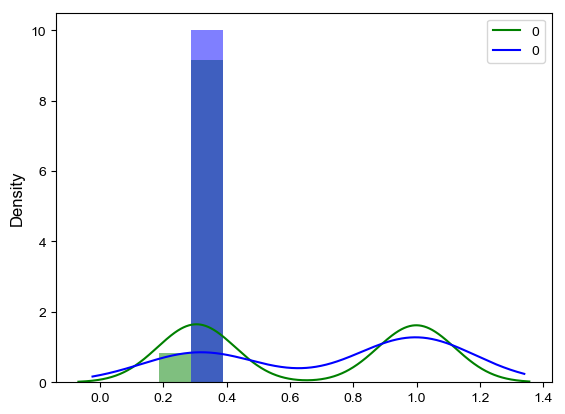

In [97]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] < -.05)]

afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chrX') & (pairs_20afr['windowStartPos'] == 25690112),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] =='chrX') & (pairs_20afr['windowStartPos'] == 25690112),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.1
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.1), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.1), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green')
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue')

pairs_20afr.loc[(pairs_20afr['chr'] =='chr7') & (pairs_20afr['windowStartPos'] == 25690112),'comps_diff_mean']
plt.show();


In [66]:
pairs_20afr[(pairs_20afr['comps_diff_mean'] < 0.000001)].sort_values('mwuP').head()


chr  windowStartPos  masked_coverage  \
2974  chr10        71303168         0.735059   
3661  chr13        76021760         0.706116   
3363  chr12        24641536         0.666136   
3831  chr14        73400320         0.527597   
2227   chr7        44564480         0.616826   

      AFR_GWD_female_HG03539_VS_AFR_ESN_female_HG03105  \
2974                                          0.998936   
3661                                          0.999781   
3363                                          0.962365   
3831                                          0.999656   
2227                                          0.999656   

      AFR_LWK_female_NA19378_VS_AFR_ESN_female_HG03105  \
2974                                          0.999640   
3661                                          0.999810   
3363                                          0.999802   
3831                                          0.894773   
2227                                          0.999483   

      AFR_LWK_female_NA19378_VS_AFR_GWD_female_HG03539  \
2974                                          0.999271   
3661                                          0.999907   
3363                                          0.961171   
3831                                          0.898873   
2227                                          0.999771   

      AFR_MSL_female_HG03212_VS_AFR_ESN_female_HG03105  \
2974                                          0.999353   
3661                                          0.999764   
3363                                          0.999645   
3831                                          0.999669   
2227                                          0.999485   

      AFR_MSL_female_HG03212_VS_AFR_GWD_female_HG03539  \
2974                                          0.999394   
3661                                          0.999876   
3363                                          0.961014   
3831                                          0.999498   
2227                                          0.999770   

      AFR_MSL_female_HG03212_VS_AFR_LWK_female_NA19378  \
2974                                          0.999546   
3661                                          0.999897   
3363                                          0.999813   
3831                                          0.897580   
2227                                          0.999748   

      AFR_ESN_female_HG03499_VS_AFR_ESN_female_HG03105       ...         \
2974                                          0.999333       ...          
3661                                          0.999797       ...          
3363                                          0.999823       ...          
3831                                          0.999773       ...          
2227                                          0.999754       ...          

      vindija_VS_AFR_MSL_male_HG03057  vindija_VS_AFR_MSL_male_HG03060  \
2974                         0.997641                         0.957571   
3661                         0.999315                         0.999137   
3363                         0.998756                         0.998846   
3831                         0.998708                         0.998881   
2227                         0.999151                         0.999192   

      vindija_VS_AFR_MSL_male_HG03074  vindija_VS_AFR_MSL_male_HG03077  \
2974                         0.996968                         0.996887   
3661                         0.999423                         0.999295   
3363                         0.999129                         0.999228   
3831                         0.999099                         0.999297   
2227                         0.998899                         0.999239   

              mwuP  afr_arcComps_mean  afr_afrComps_mean  afr_arcComps_sd  \
2974  2.071396e-09           0.994876           0.994240         0.008810   
3661  2.221660e-09           0.998531           0.997804         0.003601   
3363  2.738919e-09           0.997216           0.995

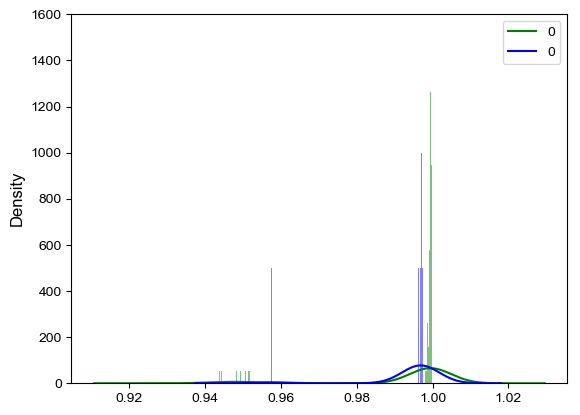

In [68]:
# Low delta but highly sig P
chr = 'chr2'
pos = 218628096

# high delta, highly sig P
chr = 'chr2'
pos = 209190912

# negative delta, sig P
chr = 'chr10'
pos = 71303168

afr_afr_dist = pairs_20afr.loc[(pairs_20afr['chr'] ==chr) & (pairs_20afr['windowStartPos'] == pos),afr_afrComps].values.flatten()
afr_arc_dist = pairs_20afr.loc[(pairs_20afr['chr'] ==chr) & (pairs_20afr['windowStartPos'] == pos),afr_arcComps].values.flatten()

minval = round(min(np.concatenate((afr_afr_dist, afr_arc_dist))),5) - 0.0001
fig, ax = plt.subplots();
ax.hist(afr_afr_dist, bins=np.arange(minval,1,0.0001), color='green', density=True,alpha=0.5);
ax.hist(afr_arc_dist, bins=np.arange(minval,1,0.0001), color='blue', density=True, alpha=0.5);
pd.DataFrame(afr_afr_dist).plot.kde(ax=ax,color='green');
pd.DataFrame(afr_arc_dist).plot.kde(ax=ax,color='blue');

In [94]:
subset = pairs_20afr[(pairs_20afr['comps_diff_mean'] > 0.005) & (pairs_20afr['mwuP'] < 0.05/4999)]
len(subset)
subset['end'] = subset['windowStartPos'] + 2**20
subset = subset[['chr','windowStartPos','end']]
for i,v in subset.iterrows():
    print('%s %i %i' % (v['chr'],(v['windowStartPos']+v['end'])/2,1+(v['windowStartPos']+v['end'])/2))
    #print('%s %s %s' % (v['chr'],v['windowStartPos'],v['end']))

254

chr1 50331648 50331649
chr1 67108864 67108865
chr1 67633152 67633153
chr1 73924608 73924609
chr1 74448896 74448897
chr1 78118912 78118913
chr1 98566144 98566145
chr1 100663296 100663297
chr1 104857600 104857601
chr1 105906176 105906177
chr1 165675008 165675009
chr1 175636480 175636481
chr1 189267968 189267969
chr1 193986560 193986561
chr1 194510848 194510849
chr1 198705152 198705153
chr1 199229440 199229441
chr1 212860928 212860929
chr1 213385216 213385217
chr1 220200960 220200961
chr1 233832448 233832449
chr1 234356736 234356737
chr1 247463936 247463937
chr2 7864320 7864321
chr2 12582912 12582913
chr2 15204352 15204353
chr2 15728640 15728641
chr2 22020096 22020097
chr2 22544384 22544385
chr2 29884416 29884417
chr2 40894464 40894465
chr2 46137344 46137345
chr2 46661632 46661633
chr2 63438848 63438849
chr2 67633152 67633153
chr2 76546048 76546049
chr2 107479040 107479041
chr2 108527616 108527617
chr2 109051904 109051905
chr2 126353408 126353409
chr2 137363456 137363457
chr2 204996608 20

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
